Problem 1 for the Data Set : Shoesales.csv

You are an analyst in the IJK shoe company and you are expected to forecast the sales of the pairs of shoes for the upcoming 12 months from where the data ends. The data for the pair of shoe sales have been given to you from January 1980 to July 1995.

1. Read the data as an appropriate Time Series data and plot the data.

In [6]:
from google.colab import files
uploaded = files.upload()

Saving Shoesales.csv to Shoesales (5).csv


In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
import sklearn
import statsmodels

In [8]:
print('Numpy version:',np.__version__)
print('Pandas version:',pd.__version__)
print('Seaborn version:',sns.__version__)
print('Matplotlib version:',matplotlib.__version__)
print('Sklearn version:',sklearn.__version__)
print('Statsmodels version:',statsmodels.__version__)

Numpy version: 1.21.5
Pandas version: 1.3.5
Seaborn version: 0.11.2
Matplotlib version: 3.2.2
Sklearn version: 1.0.2
Statsmodels version: 0.13.2


In [9]:
!pip install -U statsmodels


In [10]:
!pip install -U sklearn

Method 1

In [11]:
df1 = pd.read_csv('Shoesales.csv')

In [12]:
df1.head()

YearMonth  Shoe_Sales
0   1980-01          85
1   1980-02          89
2   1980-03         109
3   1980-04          95
4   1980-05          91

In [13]:
df1 = pd.read_csv('Shoesales.csv', parse_dates = ['YearMonth'], index_col = 'YearMonth')

In [14]:
df1.head()

Shoe_Sales
YearMonth             
1980-01-01          85
1980-02-01          89
1980-03-01         109
1980-04-01          95
1980-05-01          91

In [15]:
df1.tail()

Shoe_Sales
YearMonth             
1995-03-01         188
1995-04-01         195
1995-05-01         189
1995-06-01         220
1995-07-01         274

In [16]:
print("The no. of entries: ",df1.shape[0])

The no. of entries:  187


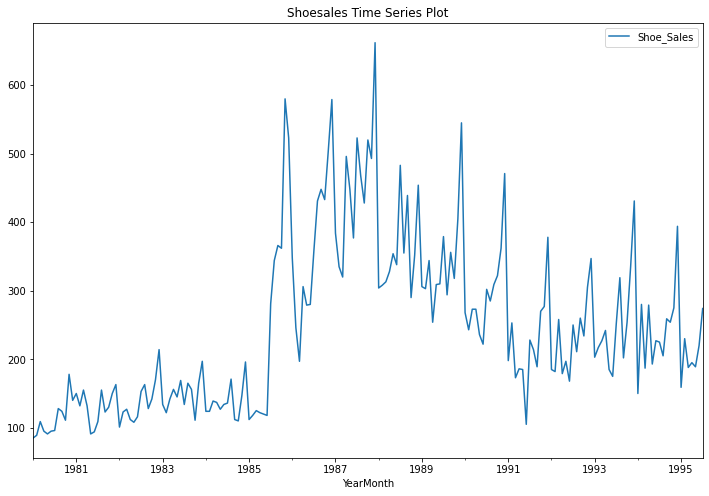

In [17]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
df1.plot()
plt.title("Shoesales Time Series Plot")
plt.show()

Method 2

In [18]:
df_1 = pd.read_csv("Shoesales.csv")

In [19]:
df_1.head()

YearMonth  Shoe_Sales
0   1980-01          85
1   1980-02          89
2   1980-03         109
3   1980-04          95
4   1980-05          91

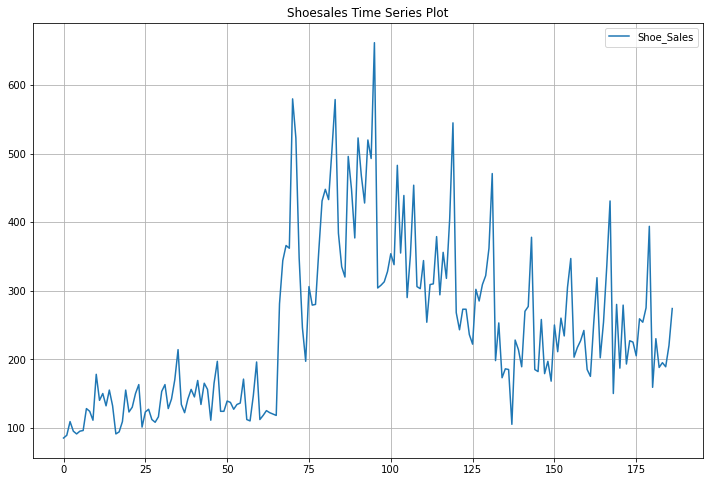

In [20]:
df_1.plot();
plt.title("Shoesales Time Series Plot")
plt.grid()

In [21]:
date1 = pd.date_range(start='1/1/1980', end='7/31/1995', freq='M')

In [22]:
date1

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [23]:
df_1['Time_Stamp'] = pd.DataFrame(date1,columns=['Month'])
df_1.head()

YearMonth  Shoe_Sales Time_Stamp
0   1980-01          85 1980-01-31
1   1980-02          89 1980-02-29
2   1980-03         109 1980-03-31
3   1980-04          95 1980-04-30
4   1980-05          91 1980-05-31

In [24]:
df = df_1.set_index('Time_Stamp')
df.drop(['YearMonth'], axis=1, inplace=True)
df.head()

Shoe_Sales
Time_Stamp            
1980-01-31          85
1980-02-29          89
1980-03-31         109
1980-04-30          95
1980-05-31          91

Text(0.5, 0, 'YearMonth')

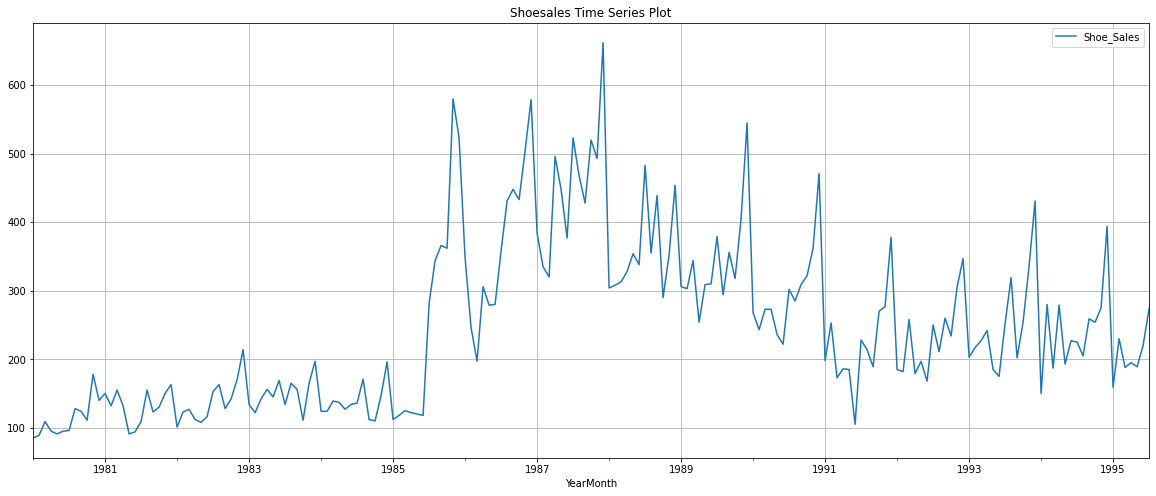

In [25]:
from pylab import rcParams
rcParams['figure.figsize'] = 20,8
df.plot(grid=True);
plt.title("Shoesales Time Series Plot")
plt.xlabel('YearMonth')

2. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

In [26]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Shoe_Sales  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


In [27]:
df1.describe()

Shoe_Sales
count  187.000000
mean   245.636364
std    121.390804
min     85.000000
25%    143.500000
50%    220.000000
75%    315.500000
max    662.000000

In [28]:
null = df1.isnull().sum()
print('Number of null values in the dataset = ', null)

Number of null values in the dataset =  Shoe_Sales    0
dtype: int64


In [29]:
dups = df1.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 42


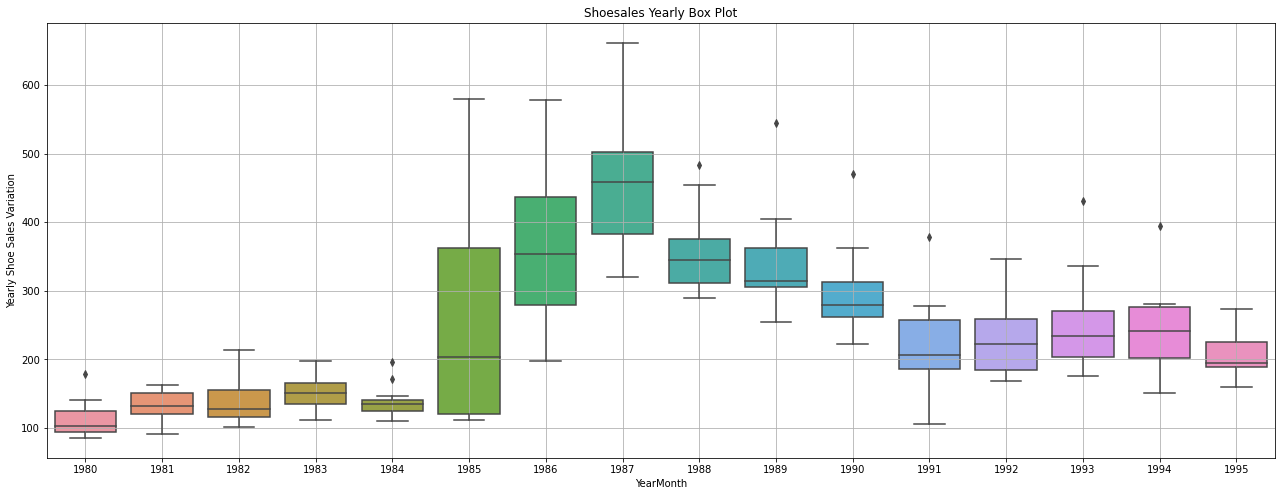

In [30]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df1.index.year,y = df1.values[:,0],ax=ax)
plt.title("Shoesales Yearly Box Plot")
plt.ylabel('Yearly Shoe Sales Variation');
plt.grid();

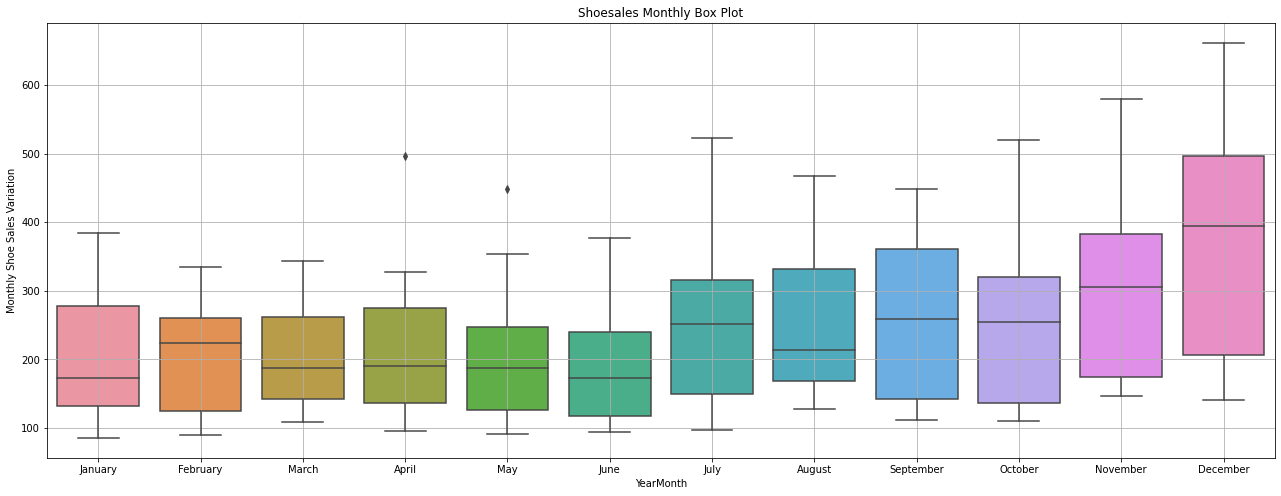

In [31]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df1.index.month_name(),y = df1.values[:,0],ax=ax)
plt.title("Shoesales Monthly Box Plot")
plt.ylabel('Monthly Shoe Sales Variation');
plt.grid();

In [32]:
monthly_sales_across_years = pd.pivot_table(df1, values = 'Shoe_Sales', columns = df1.index.month_name(), index = df1.index.year)
monthly_sales_across_years

YearMonth  April  August  December  February  January   July   June  March  \
YearMonth                                                                    
1980        95.0   128.0     140.0      89.0     85.0   96.0   95.0  109.0   
1981       132.0   155.0     163.0     132.0    150.0  109.0   94.0  155.0   
1982       112.0   163.0     214.0     123.0    101.0  153.0  116.0  127.0   
1983       156.0   165.0     197.0     122.0    134.0  134.0  169.0  142.0   
1984       137.0   171.0     196.0     124.0    124.0  136.0  134.0  139.0   
1985       122.0   344.0     523.0     118.0    112.0  281.0  118.0  125.0   
1986       306.0   431.0     579.0     246.0    348.0  358.0  280.0  197.0   
1987       496.0   468.0     662.0     335.0    384.0  523.0  377.0  320.0   
1988       328.0   355.0     454.0     308.0    304.0  483.0  338.0  313.0   
1989       254.0   294.0     545.0     303.0    306.0  379.0  310.0  344.0   
1990       273.0   285.0     471.0     243.0    268.0  302.0  222.0  273.0   
1991       186.0   214.0     378.0     253.0    198.0  228.0  105.0  173.0   
1992       179.0   211.0     347.0     182.0    185.0  250.0  168.0  258.0   
1993       242.0   319.0     431.0     217.0    203.0  252.0  175.0  227.0   
1994       279.0   205.0     394.0     280.0    150.0  225.0  227.0  187.0   
1995       195.0     NaN       NaN     230.0    159.0  274.0  220.0  188.0   

YearMonth    May  November  October  September  
YearMonth                                       
1980        91.0     178.0    111.0      124.0  
1981        91.0     150.0    130.0      123.0  
1982       108.0     170.0    142.0      128.0  
1983       145.0     165.0    111.0      156.0  
1984       127.0     147.0    110.0      112.0  
1985       120.0     580.0    362.0      366.0  
1986       279.0     504.0    433.0      448.0  
1987       448.0     493.0    520.0      428.0  
1988       354.0     352.0    290.0      439.0  
1989       309.0     405.0    318.0      356.0  
1990       236.0     362.0    322.0      309.0  
1991       185.0     277.0    270.0      189.0  
1992       197.0     305.0    234.0      260.0  
1993       185.0     336.0    254.0      202.0  
1994       193.0     275.0    254.0      259.0  
1995       189.0       NaN      NaN        NaN

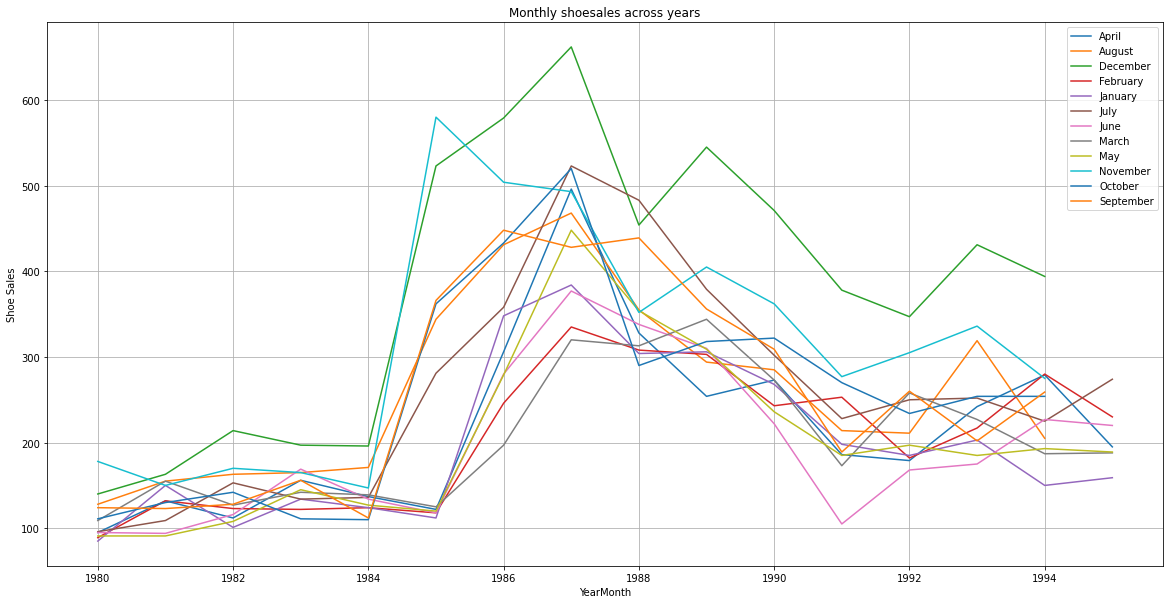

In [33]:
monthly_sales_across_years.plot(figsize=(20,10))
plt.grid()
plt.title("Monthly shoesales across years")
plt.ylabel('Shoe Sales');
plt.legend(loc='best');

Yearly Plot

In [34]:
df1_yearly_sum = df1.resample('A').sum()
df1_yearly_sum.head()

Shoe_Sales
YearMonth             
1980-12-31        1341
1981-12-31        1584
1982-12-31        1657
1983-12-31        1796
1984-12-31        1657

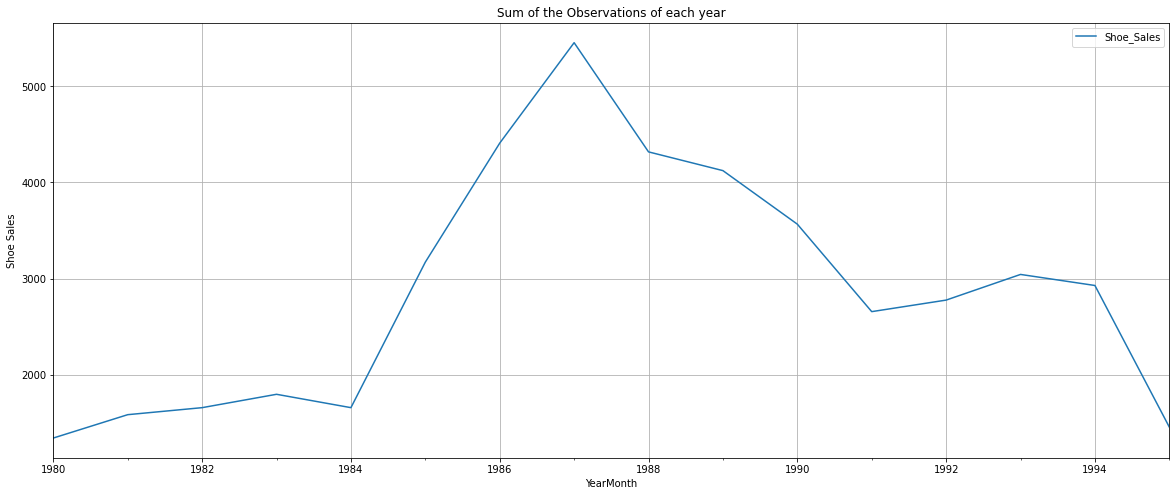

In [35]:
df1_yearly_sum.plot();
plt.grid()
plt.title("Sum of the Observations of each year")
plt.ylabel('Shoe Sales');

In [36]:
df1_yearly_mean = df1.resample('Y').mean()
df1_yearly_mean.head()

Shoe_Sales
YearMonth             
1980-12-31  111.750000
1981-12-31  132.000000
1982-12-31  138.083333
1983-12-31  149.666667
1984-12-31  138.083333

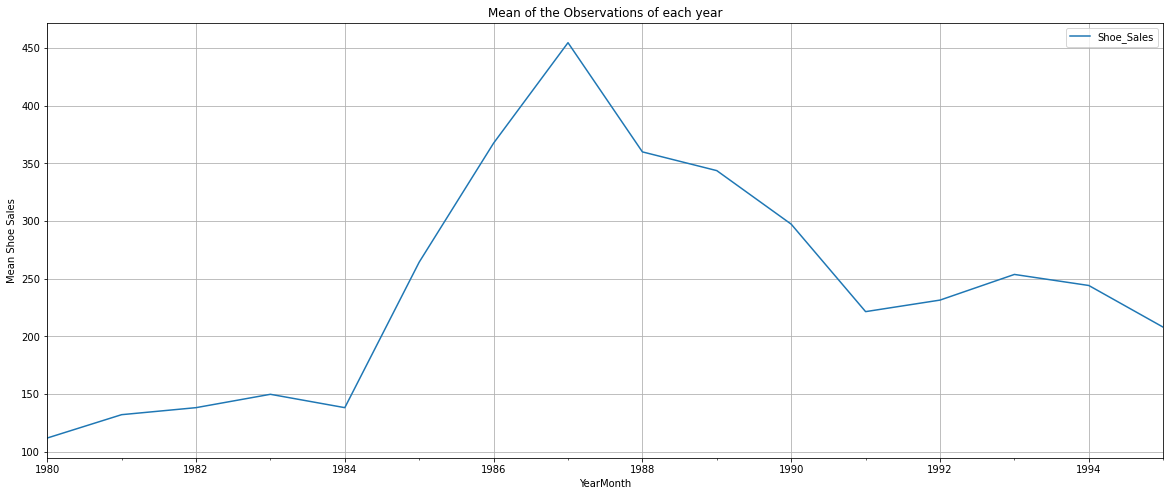

In [37]:
df1_yearly_mean.plot();
plt.grid()
plt.title("Mean of the Observations of each year")
plt.ylabel('Mean Shoe Sales');

Quarterly Plot

In [38]:
df1_quarterly_sum = df1.resample('Q').sum()
df1_quarterly_sum.head()

Shoe_Sales
YearMonth             
1980-03-31         283
1980-06-30         281
1980-09-30         348
1980-12-31         429
1981-03-31         437

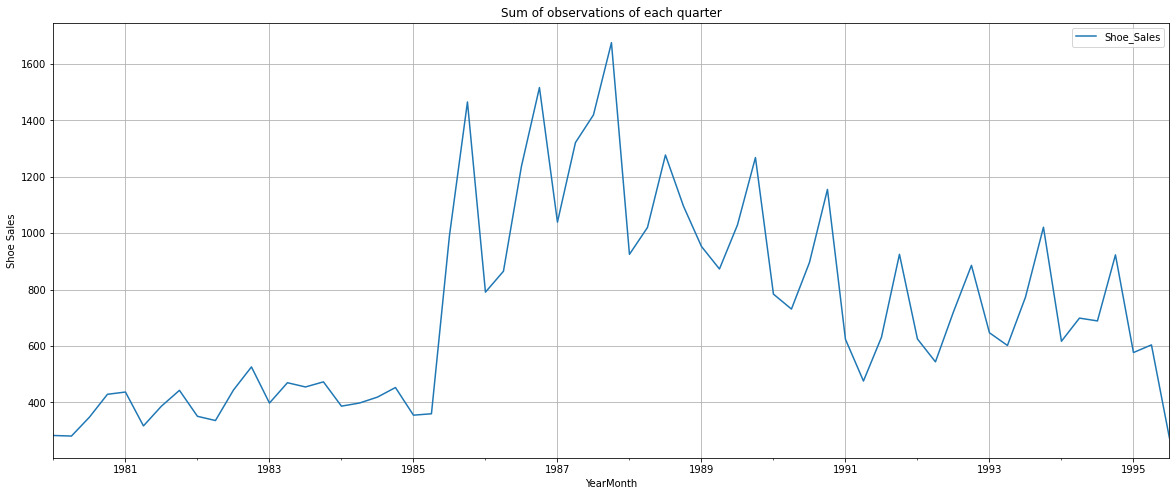

In [39]:
df1_quarterly_sum.plot();
plt.title("Sum of observations of each quarter")
plt.ylabel('Shoe Sales');
plt.grid()

In [40]:
df1_quarterly_mean = df1.resample('Q').mean()
df1_quarterly_mean.head()

Shoe_Sales
YearMonth             
1980-03-31   94.333333
1980-06-30   93.666667
1980-09-30  116.000000
1980-12-31  143.000000
1981-03-31  145.666667

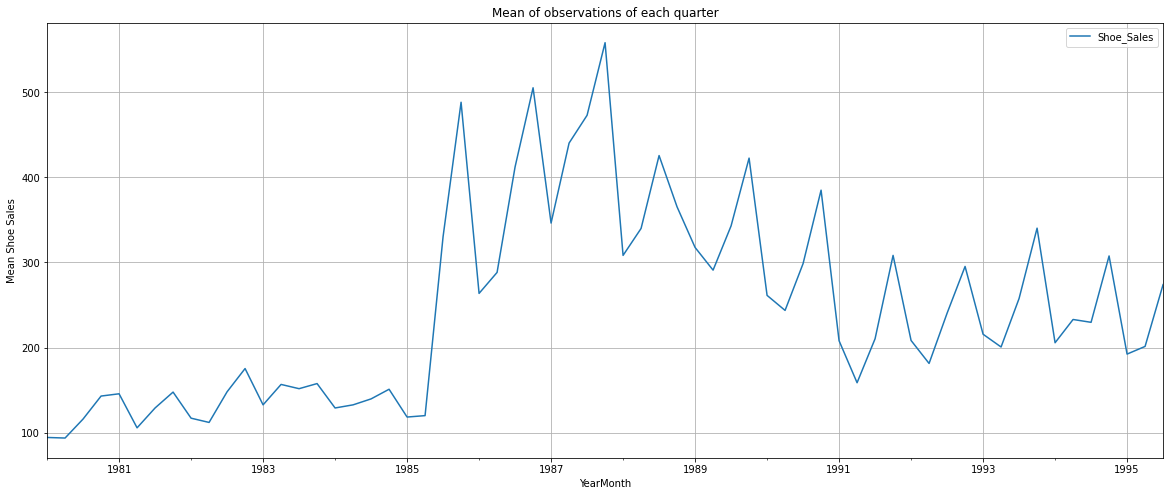

In [41]:
df1_quarterly_mean.plot();
plt.title("Mean of observations of each quarter")
plt.ylabel('Mean Shoe Sales');
plt.grid()

Daily Plot

In [42]:
df1_daily_sum = df1.resample('D').sum()
df1_daily_sum

Shoe_Sales
YearMonth             
1980-01-01          85
1980-01-02           0
1980-01-03           0
1980-01-04           0
1980-01-05           0
...                ...
1995-06-27           0
1995-06-28           0
1995-06-29           0
1995-06-30           0
1995-07-01         274

[5661 rows x 1 columns]

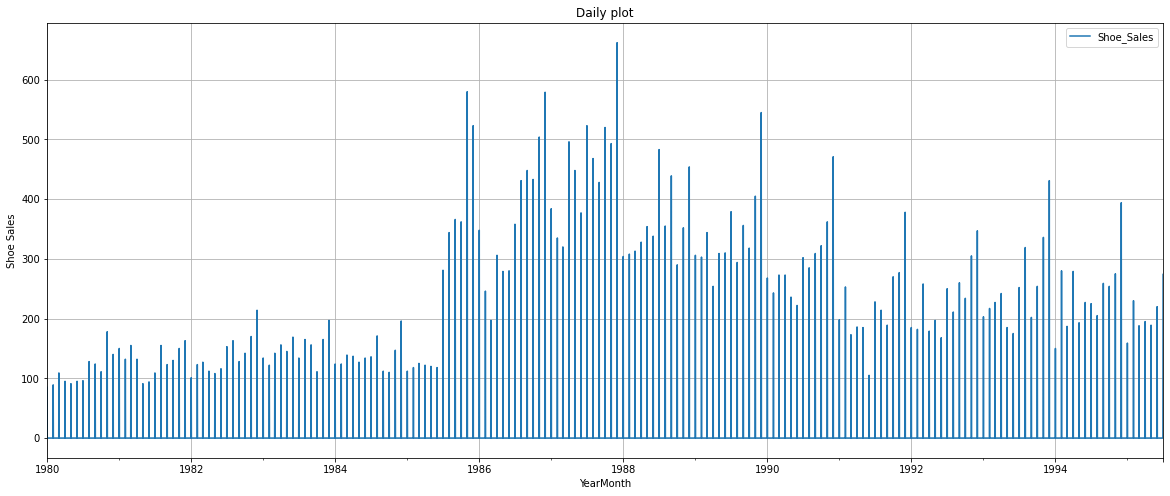

In [43]:
df1_daily_sum.plot()
plt.title("Daily plot")
plt.ylabel('Shoe Sales');
plt.grid();

Decade Plot

In [44]:
df1_decade_sum = df1.resample('10Y').sum()
df1_decade_sum

Shoe_Sales
YearMonth             
1980-12-31        1341
1990-12-31       31735
2000-12-31       12858

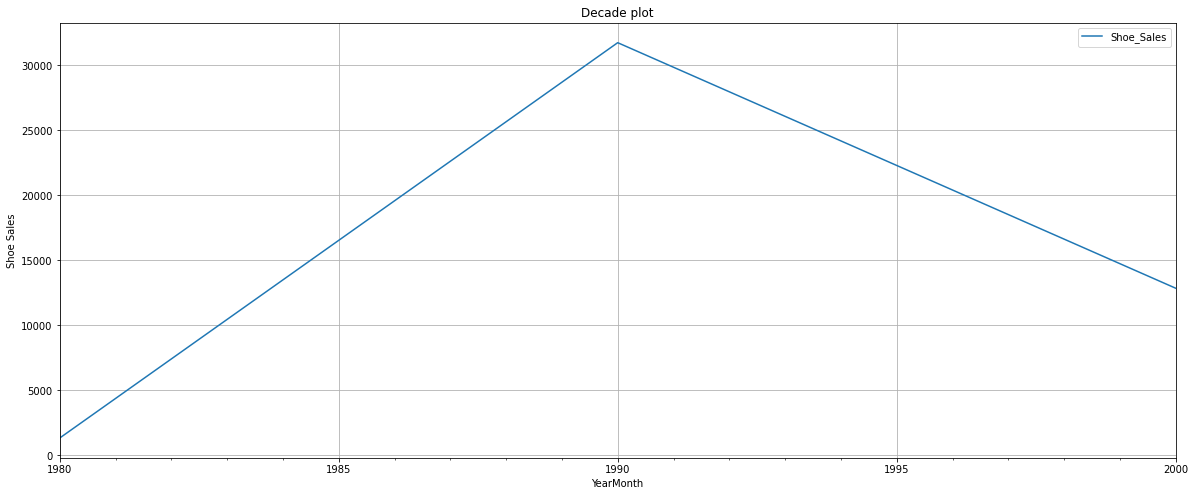

In [45]:
df1_decade_sum.plot();
plt.title("Decade plot")
plt.ylabel('Shoe Sales');
plt.grid()

Decomposing the time series

In [46]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

Additive model

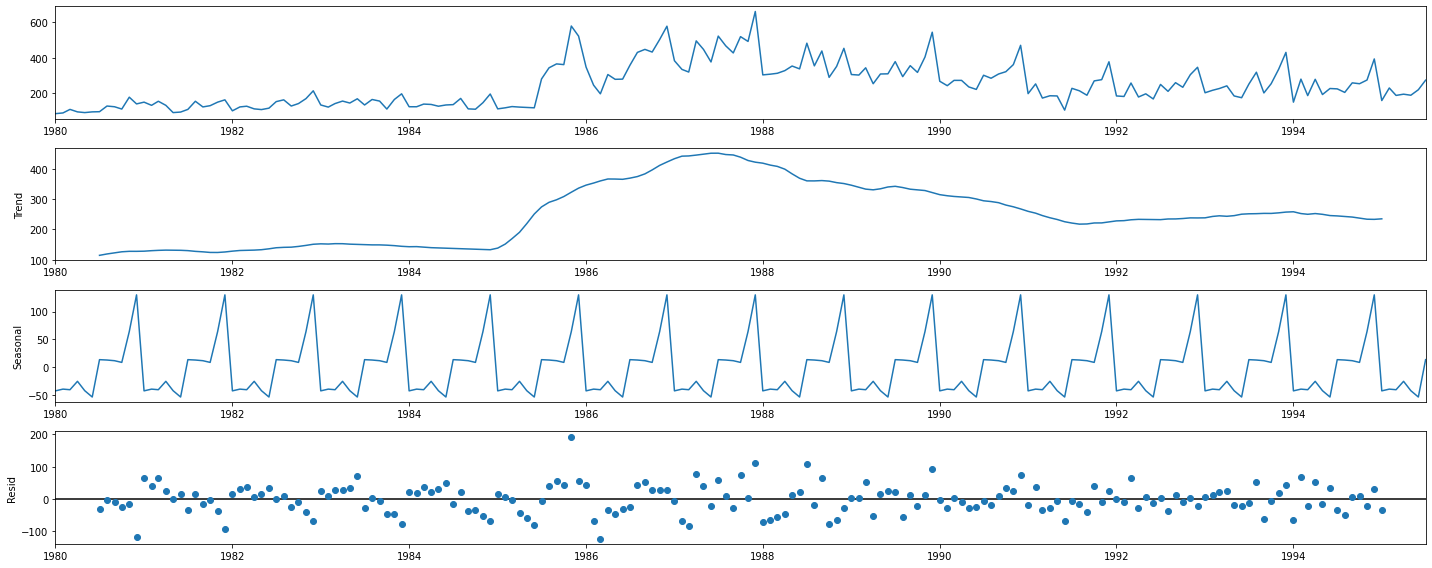

In [47]:
decomposition_add = seasonal_decompose(df1,model='additive')
decomposition_add.plot();

Multiplicative model

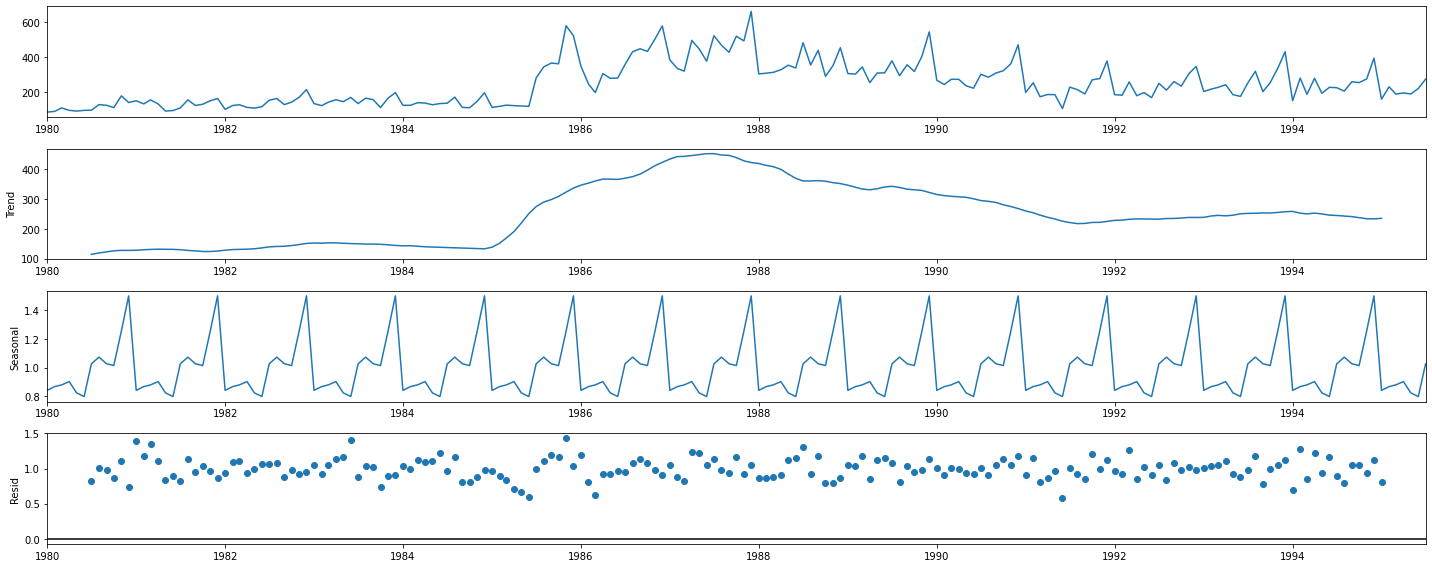

In [48]:
decomposition_mul = seasonal_decompose(df1,model='multiplicative')
decomposition_mul.plot();

In [49]:
trend = decomposition_mul.trend
seasonality = decomposition_mul.seasonal
residual = decomposition_mul.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    114.458333
1980-08-01    118.958333
1980-09-01    122.666667
1980-10-01    126.125000
1980-11-01    127.666667
1980-12-01    127.625000
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    0.840405
1980-02-01    0.866682
1980-03-01    0.878675
1980-04-01    0.901826
1980-05-01    0.823141
1980-06-01    0.797254
1980-07-01    1.025527
1980-08-01    1.072445
1980-09-01    1.026307
1980-10-01    1.013557
1980-11-01    1.254223
1980-12-01    1.499958
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01         NaN
1980-02-01         NaN
1980-03-01         NaN
1980-04-01         NaN
1980-05-01         NaN
1980-06-01         NaN
1980-07-01    0.817856
1980-08-01    1.003322
1980-09-01    0.984958
1980-10-01    0.868308
1980-11-01    1.111649
1980-12-01    0.731330
Name: resid, dtype: fl

In [50]:
deaseasonalized_trse = trend + residual
deaseasonalized_trse.head(12)

YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    115.276189
1980-08-01    119.961655
1980-09-01    123.651625
1980-10-01    126.993308
1980-11-01    128.778315
1980-12-01    128.356330
dtype: float64

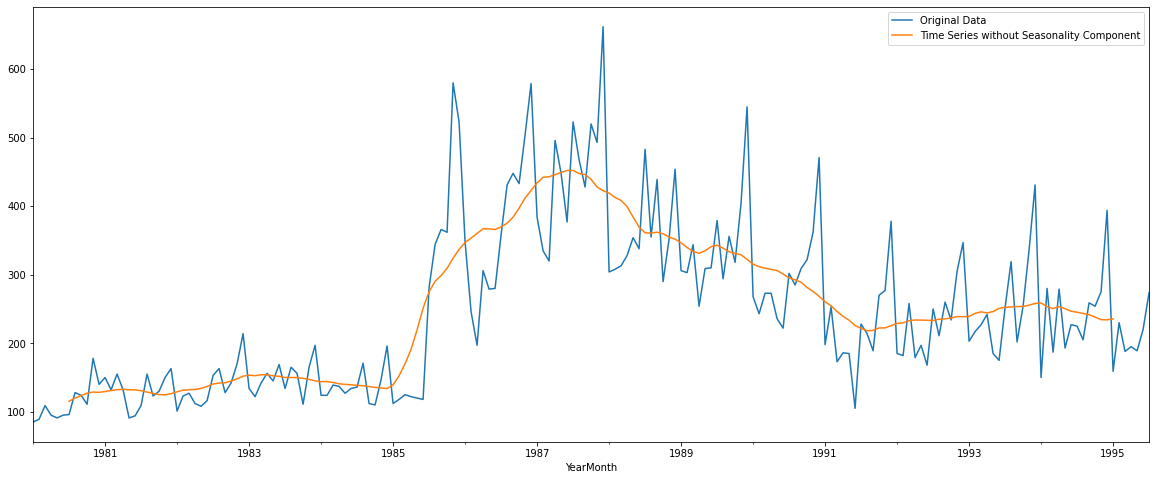

In [51]:
df1.plot()
deaseasonalized_trse.plot()
plt.legend(["Original Data", "Time Series without Seasonality Component"]);

3. Split the data into training and test. The test data should start in 1991.

In [52]:
train=df1[df1.index.year < 1991]
test=df1[df1.index.year >= 1991]

In [53]:
print('First few rows of Training Data')
display(train.head())
print('\n')
print('Last few rows of Training Data')
display(train.tail())
print('\n')
print('First few rows of Test Data')
display(test.head())
print('\n')
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


Shoe_Sales
YearMonth             
1980-01-01          85
1980-02-01          89
1980-03-01         109
1980-04-01          95
1980-05-01          91



Last few rows of Training Data


Shoe_Sales
YearMonth             
1990-08-01         285
1990-09-01         309
1990-10-01         322
1990-11-01         362
1990-12-01         471



First few rows of Test Data


Shoe_Sales
YearMonth             
1991-01-01         198
1991-02-01         253
1991-03-01         173
1991-04-01         186
1991-05-01         185



Last few rows of Test Data


Shoe_Sales
YearMonth             
1995-03-01         188
1995-04-01         195
1995-05-01         189
1995-06-01         220
1995-07-01         274

In [54]:
print('The shape of the training data is' ,train.shape)
print('The shape of the test data is' ,test.shape)

The shape of the training data is (132, 1)
The shape of the test data is (55, 1)


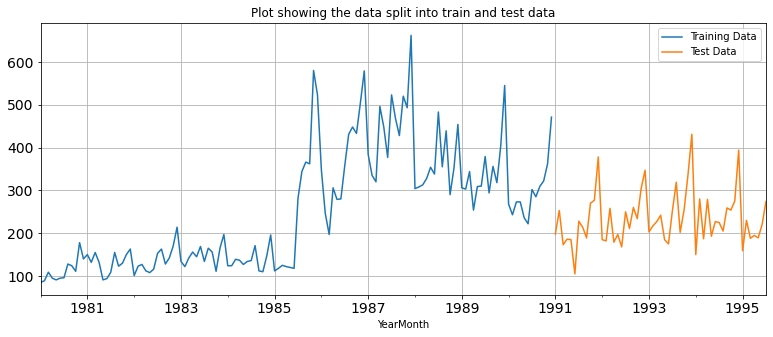

In [55]:
train['Shoe_Sales'].plot(figsize=(13,5), fontsize=14)
test['Shoe_Sales'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.title("Plot showing the data split into train and test data")
plt.legend(['Training Data','Test Data'])
plt.show()

4. Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other additional models such as regression, naïve forecast models, simple average models, moving average models should also be built on the training data and check the performance on the test data using RMSE.

Model 1: Linear Regression

In [56]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


We see that we have successfully the generated the numerical time instance order for both the training and test set. Now we will add these values in the training and test set.

In [57]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [58]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
             Shoe_Sales  time
YearMonth                   
1980-01-01          85     1
1980-02-01          89     2
1980-03-01         109     3
1980-04-01          95     4
1980-05-01          91     5 

Last few rows of Training Data 
             Shoe_Sales  time
YearMonth                   
1990-08-01         285   128
1990-09-01         309   129
1990-10-01         322   130
1990-11-01         362   131
1990-12-01         471   132 

First few rows of Test Data 
             Shoe_Sales  time
YearMonth                   
1991-01-01         198   133
1991-02-01         253   134
1991-03-01         173   135
1991-04-01         186   136
1991-05-01         185   137 

Last few rows of Test Data 
             Shoe_Sales  time
YearMonth                   
1995-03-01         188   183
1995-04-01         195   184
1995-05-01         189   185
1995-06-01         220   186
1995-07-01         274   187 



Now that our training and test data has been modified, let us go ahead use LinearRegression to build the model on the training data and test the model on the test data.

In [59]:
from sklearn.linear_model import LinearRegression

In [60]:
lr = LinearRegression()

In [61]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Shoe_Sales'])

LinearRegression()

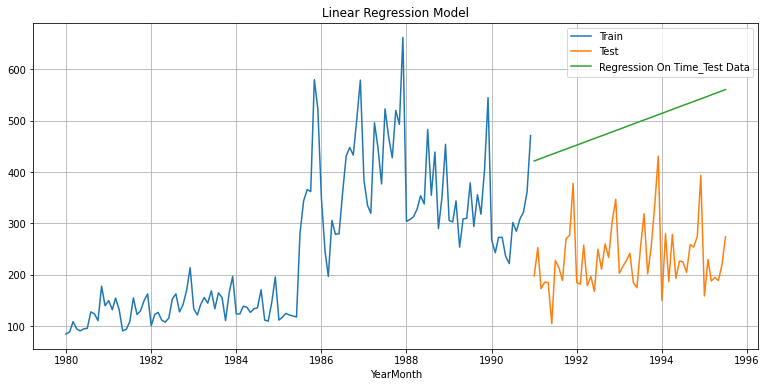

In [62]:
test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( train['Shoe_Sales'], label='Train')
plt.plot(test['Shoe_Sales'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.title('Linear Regression Model')
plt.xlabel('YearMonth')
plt.grid();

In [63]:
from sklearn import metrics

In [64]:
## Test Data - RMSE

rmse_model1_test = metrics.mean_squared_error(test['Shoe_Sales'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 266.276


In [65]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

Test RMSE
RegressionOnTime  266.276472

Model 2: Naive Approach: $\hat{y}_{t+1} = y_t$




In [66]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [67]:
NaiveModel_test['naive'] = np.asarray(train['Shoe_Sales'])[len(np.asarray(train['Shoe_Sales']))-1]
NaiveModel_test['naive'].head()

YearMonth
1991-01-01    471
1991-02-01    471
1991-03-01    471
1991-04-01    471
1991-05-01    471
Name: naive, dtype: int64

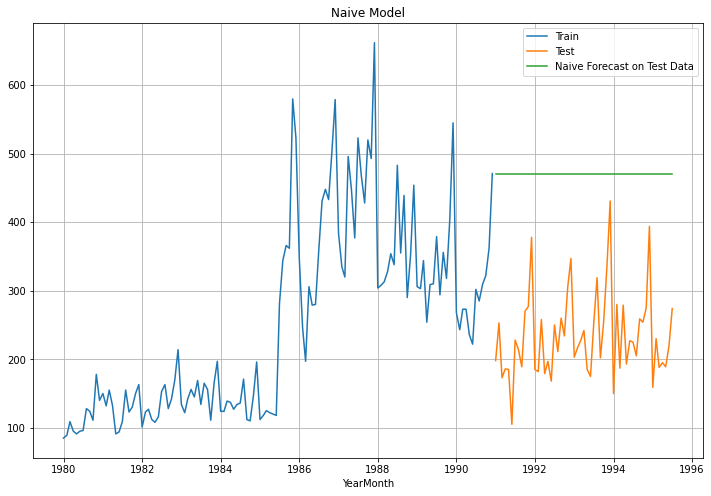

In [68]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['Shoe_Sales'], label='Train')
plt.plot(test['Shoe_Sales'], label='Test')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Model")
plt.xlabel('YearMonth')
plt.grid();

In [69]:
## Test Data - RMSE

rmse_model2_test = metrics.mean_squared_error(test['Shoe_Sales'],NaiveModel_test['naive'],squared=False)
print("For Naive forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For Naive forecast on the Test Data,  RMSE is 245.121


In [70]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

Test RMSE
RegressionOnTime  266.276472
NaiveModel        245.121306

Model 3: Simple Average

In [71]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [72]:
SimpleAverage_test['mean_forecast'] = train['Shoe_Sales'].mean()
SimpleAverage_test.head()

Shoe_Sales  mean_forecast
YearMonth                            
1991-01-01         198     250.575758
1991-02-01         253     250.575758
1991-03-01         173     250.575758
1991-04-01         186     250.575758
1991-05-01         185     250.575758

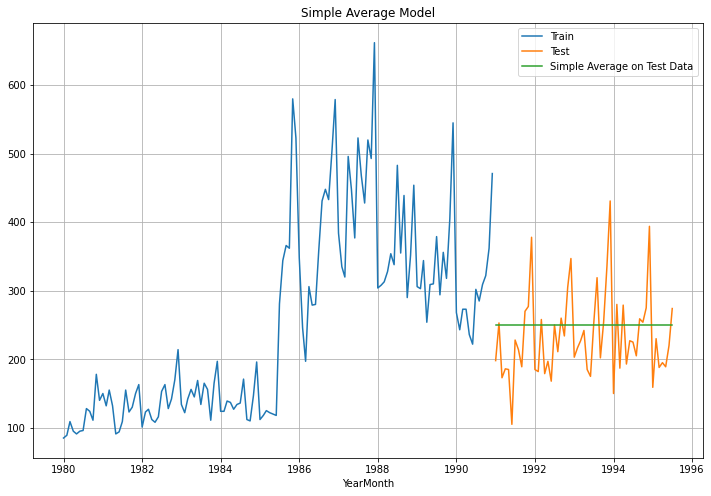

In [73]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Shoe_Sales'], label='Train')
plt.plot(SimpleAverage_test['Shoe_Sales'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Model")
plt.xlabel('YearMonth')
plt.grid();

In [74]:
## Test Data - RMSE 

rmse_model3_test = metrics.mean_squared_error(test['Shoe_Sales'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 63.985


In [75]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

Test RMSE
RegressionOnTime    266.276472
NaiveModel          245.121306
SimpleAverageModel   63.984570

Model 4: Moving Average (MA)

In [76]:
MovingAverage = df1.copy()
MovingAverage.head()

Shoe_Sales
YearMonth             
1980-01-01          85
1980-02-01          89
1980-03-01         109
1980-04-01          95
1980-05-01          91

In [77]:
MovingAverage['Trailing_2'] = MovingAverage['Shoe_Sales'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Shoe_Sales'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Shoe_Sales'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Shoe_Sales'].rolling(9).mean()

MovingAverage.head()

Shoe_Sales  Trailing_2  Trailing_4  Trailing_6  Trailing_9
YearMonth                                                             
1980-01-01          85         NaN         NaN         NaN         NaN
1980-02-01          89        87.0         NaN         NaN         NaN
1980-03-01         109        99.0         NaN         NaN         NaN
1980-04-01          95       102.0        94.5         NaN         NaN
1980-05-01          91        93.0        96.0         NaN         NaN

In [78]:
MovingAverage.tail()

Shoe_Sales  Trailing_2  Trailing_4  Trailing_6  Trailing_9
YearMonth                                                             
1995-03-01         188       209.0      242.75  250.000000  243.222222
1995-04-01         195       191.5      193.00  240.166667  239.888889
1995-05-01         189       192.0      200.50  225.833333  238.111111
1995-06-01         220       204.5      198.00  196.833333  233.777778
1995-07-01         274       247.0      219.50  216.000000  236.000000

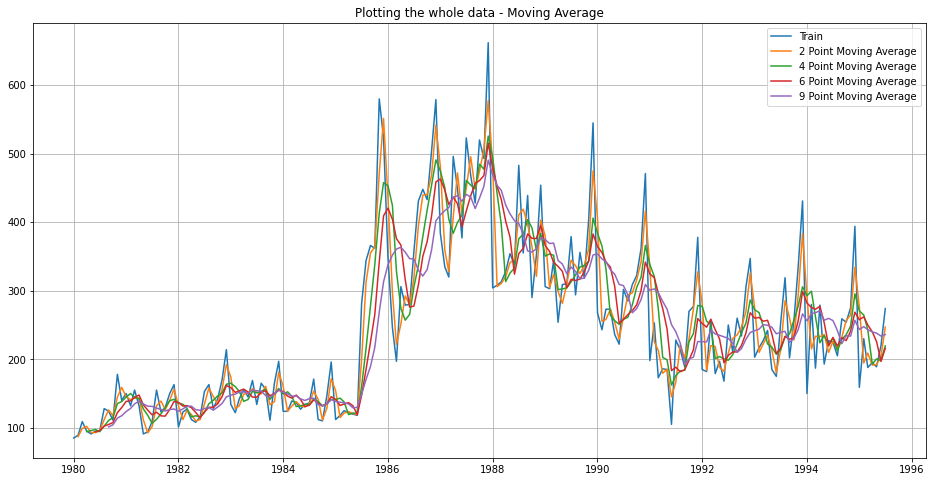

In [79]:
plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Shoe_Sales'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.title('Plotting the whole data - Moving Average')
plt.grid();

In [80]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[MovingAverage.index.year < 1991]
trailing_MovingAverage_test=MovingAverage[MovingAverage.index.year >= 1991]

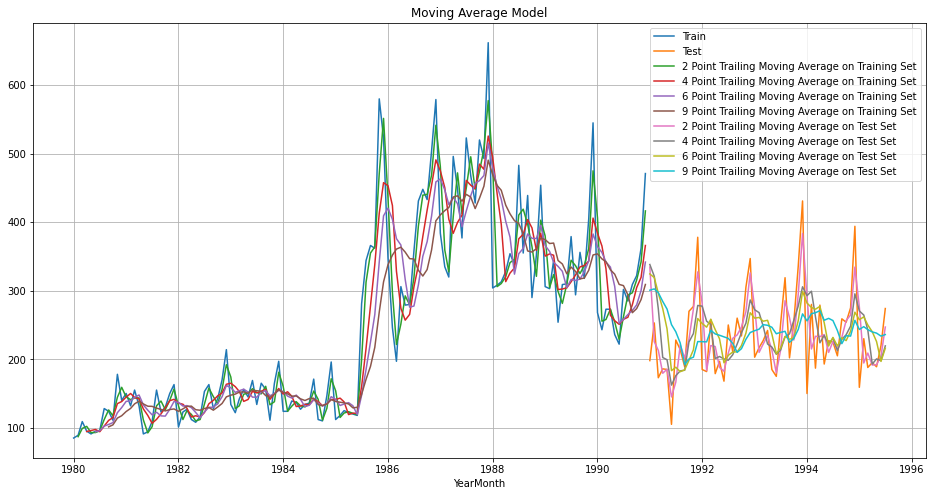

In [81]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Shoe_Sales'], label='Train')
plt.plot(trailing_MovingAverage_test['Shoe_Sales'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.title('Moving Average Model')
plt.xlabel('YearMonth')
plt.grid();

In [82]:
## Test Data - RMSE --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Shoe_Sales'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE  --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Shoe_Sales'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Shoe_Sales'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE  --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Shoe_Sales'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f " %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Test Data,  RMSE is 45.949
For 4 point Moving Average Model forecast on the Test Data,  RMSE is 57.873
For 6 point Moving Average Model forecast on the Test Data,  RMSE is 63.457
For 9 point Moving Average Model forecast on the Test Data,  RMSE is 67.724 


In [83]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

Test RMSE
RegressionOnTime             266.276472
NaiveModel                   245.121306
SimpleAverageModel            63.984570
2pointTrailingMovingAverage   45.948736
4pointTrailingMovingAverage   57.872686
6pointTrailingMovingAverage   63.456893
9pointTrailingMovingAverage   67.723648

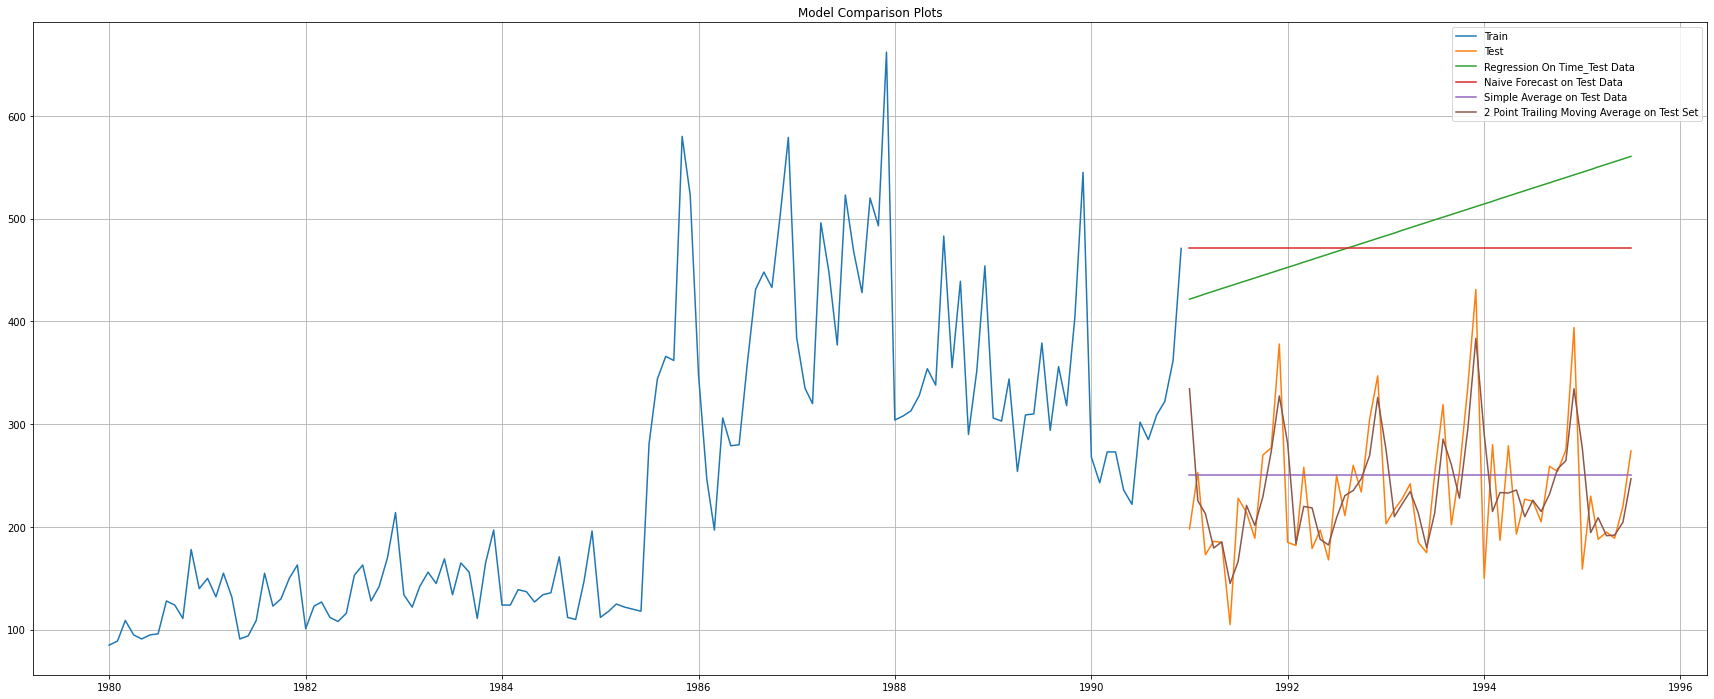

In [84]:
## Plotting on both Training and Test data

plt.figure(figsize=(30,12))
plt.plot(train['Shoe_Sales'], label='Train')
plt.plot(test['Shoe_Sales'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

Model 5: Simple Exponential Smoothing Model

In [85]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [86]:
SES_train = train.copy()
SES_test = test.copy()

In [87]:
model_SES = SimpleExpSmoothing(SES_train['Shoe_Sales'])

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [88]:
model_SES_autofit = model_SES.fit(optimized=True)

In [89]:
model_SES_autofit.params

{'damping_trend': nan,
 'initial_level': 88.82999209767735,
 'initial_seasons': array([], dtype=float64),
 'initial_trend': nan,
 'lamda': None,
 'remove_bias': False,
 'smoothing_level': 0.6050492729961923,
 'smoothing_seasonal': nan,
 'smoothing_trend': nan,
 'use_boxcox': False}

In [90]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

Shoe_Sales     predict
YearMonth                         
1991-01-01         198  420.229864
1991-02-01         253  420.229864
1991-03-01         173  420.229864
1991-04-01         186  420.229864
1991-05-01         185  420.229864

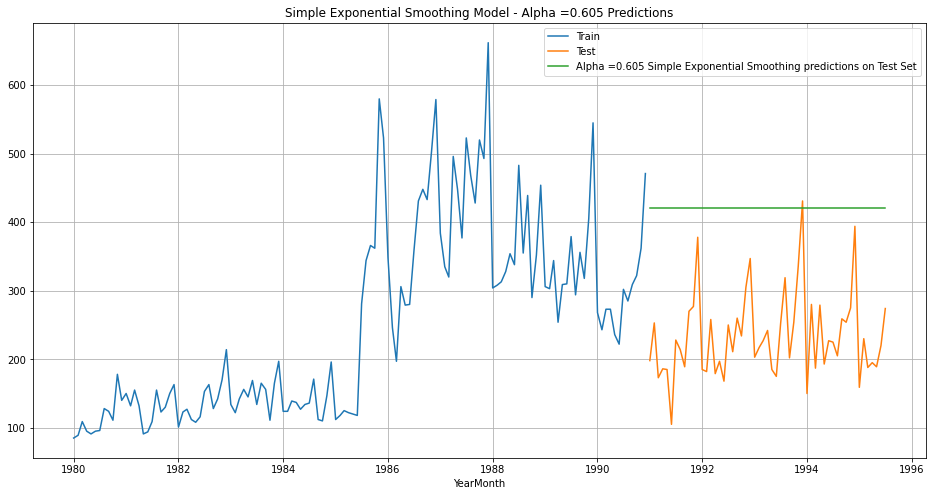

In [91]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['Shoe_Sales'], label='Train')
plt.plot(SES_test['Shoe_Sales'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.605 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.xlabel('YearMonth')
plt.title('Simple Exponential Smoothing Model - Alpha =0.605 Predictions');

In [92]:
## Test Data

rmse_model5_test_1 = metrics.mean_squared_error(SES_test['Shoe_Sales'],SES_test['predict'],squared=False)
print("For Alpha =0.605 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))


For Alpha =0.605 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 196.405


In [93]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1]},index=['Alpha=0.605,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

Test RMSE
RegressionOnTime                        266.276472
NaiveModel                              245.121306
SimpleAverageModel                       63.984570
2pointTrailingMovingAverage              45.948736
4pointTrailingMovingAverage              57.872686
6pointTrailingMovingAverage              63.456893
9pointTrailingMovingAverage              67.723648
Alpha=0.605,SimpleExponentialSmoothing  196.404844

Setting different alpha values. Remember, the higher the alpha value more weightage is given to the more recent observation. That means, what happened recently will happen again. We will run a loop with different alpha values to understand which particular value works best for alpha on the test set.

In [94]:
resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_6

Empty DataFrame
Columns: [Alpha Values, Train RMSE, Test RMSE]
Index: []

In [95]:
for i in np.arange(0.3,1.1,0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=len(test))
    
    rmse_model5_train_i = metrics.mean_squared_error(SES_train['Shoe_Sales'],SES_train['predict',i],squared=False)
    
    rmse_model5_test_i = metrics.mean_squared_error(SES_test['Shoe_Sales'],SES_test['predict',i],squared=False)
    
    resultsDf_6 = resultsDf_6.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i 
                                      ,'Test RMSE':rmse_model5_test_i}, ignore_index=True)

In [96]:
resultsDf_6.sort_values(by=['Test RMSE'],ascending=True)

Alpha Values  Train RMSE   Test RMSE
0           0.3   74.555356  143.400350
1           0.4   73.062722  162.553211
2           0.5   72.200617  180.072484
3           0.6   71.902349  195.663327
4           0.7   72.131707  209.658339
5           0.8   72.846955  222.417584
6           0.9   74.023429  234.188166
7           1.0   75.673942  245.121306

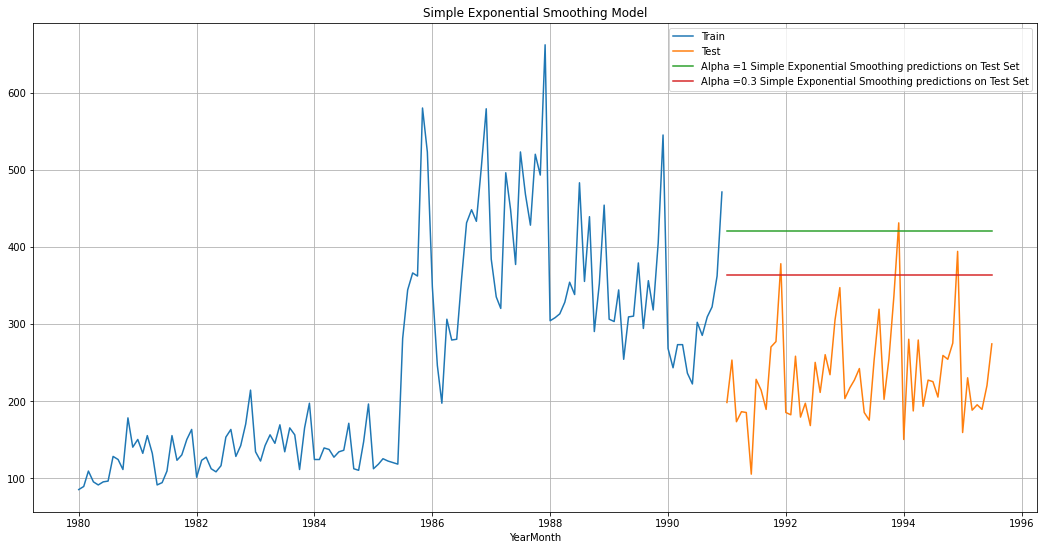

In [97]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(SES_train['Shoe_Sales'], label='Train')
plt.plot(SES_test['Shoe_Sales'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =1 Simple Exponential Smoothing predictions on Test Set')

plt.plot(SES_test['predict', 0.3], label='Alpha =0.3 Simple Exponential Smoothing predictions on Test Set')



plt.legend(loc='best')
plt.title('Simple Exponential Smoothing Model')
plt.xlabel('YearMonth')
plt.grid();

In [98]:
resultsDf_6_1 = pd.DataFrame({'Test RMSE': [resultsDf_6.sort_values(by=['Test RMSE'],ascending=True).values[0][2]]}
                           ,index=['Alpha=0.3,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6_1])
resultsDf

Test RMSE
RegressionOnTime                        266.276472
NaiveModel                              245.121306
SimpleAverageModel                       63.984570
2pointTrailingMovingAverage              45.948736
4pointTrailingMovingAverage              57.872686
6pointTrailingMovingAverage              63.456893
9pointTrailingMovingAverage              67.723648
Alpha=0.605,SimpleExponentialSmoothing  196.404844
Alpha=0.3,SimpleExponentialSmoothing    143.400350

Model 6: Double Exponential Smoothing (Holt's Model)

Two parameters  𝛼  and  𝛽  are estimated in this model. Level and Trend are accounted for in this model.

In [99]:
DES_train = train.copy()
DES_test = test.copy()

In [100]:
model_DES = Holt(DES_train['Shoe_Sales'])

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [101]:
model_optimal_DES = model_DES.fit(optimized = True)

In [102]:
model_optimal_DES.params

{'damping_trend': nan,
 'initial_level': 84.98470015205322,
 'initial_seasons': array([], dtype=float64),
 'initial_trend': 2.655563265179697,
 'lamda': None,
 'remove_bias': False,
 'smoothing_level': 0.5988985861848554,
 'smoothing_seasonal': nan,
 'smoothing_trend': 9.963040364224436e-05,
 'use_boxcox': False}

In [103]:
DES_test['predict'] = model_optimal_DES.forecast(steps=len(test))
DES_test.head()

Shoe_Sales     predict
YearMonth                         
1991-01-01         198  423.703334
1991-02-01         253  426.357470
1991-03-01         173  429.011605
1991-04-01         186  431.665741
1991-05-01         185  434.319877

Text(0.5, 0, 'YearMonth')

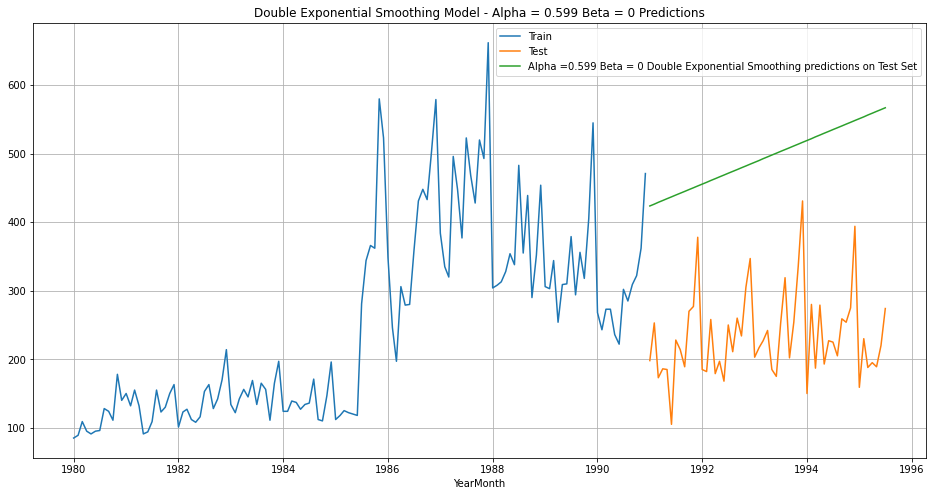

In [104]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(DES_train['Shoe_Sales'], label='Train')
plt.plot(DES_test['Shoe_Sales'], label='Test')

plt.plot(DES_test['predict'], label='Alpha =0.599 Beta = 0 Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Double Exponential Smoothing Model - Alpha = 0.599 Beta = 0 Predictions');
plt.xlabel('YearMonth')

In [105]:
## Test Data

rmse_model7_test_1 = metrics.mean_squared_error(DES_test['Shoe_Sales'],DES_test['predict'],squared=False)
print("For Alpha =0.599 Beta = 0 Double Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model7_test_1))


For Alpha =0.599 Beta = 0 Double Exponential Smoothing Model forecast on the Test Data, RMSE is 270.532


In [106]:
resultsDf_7 = pd.DataFrame({'Test RMSE': [rmse_model7_test_1]},index=['Alpha=0.599 Beta = 0 ,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7])
resultsDf

Test RMSE
RegressionOnTime                                  266.276472
NaiveModel                                        245.121306
SimpleAverageModel                                 63.984570
2pointTrailingMovingAverage                        45.948736
4pointTrailingMovingAverage                        57.872686
6pointTrailingMovingAverage                        63.456893
9pointTrailingMovingAverage                        67.723648
Alpha=0.605,SimpleExponentialSmoothing            196.404844
Alpha=0.3,SimpleExponentialSmoothing              143.400350
Alpha=0.599 Beta = 0 ,DoubleExponentialSmoothing  270.531814

In [107]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_7

Empty DataFrame
Columns: [Alpha Values, Beta Values, Train RMSE, Test RMSE]
Index: []

In [108]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=len(test))
        
        rmse_model6_train = metrics.mean_squared_error(DES_train['Shoe_Sales'],DES_train['predict',i,j],squared=False)
        
        rmse_model6_test = metrics.mean_squared_error(DES_test['Shoe_Sales'],DES_test['predict',i,j],squared=False)
        
        resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
                                          ,'Test RMSE':rmse_model6_test}, ignore_index=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_lau

In [109]:
resultsDf_7

Alpha Values  Beta Values  Train RMSE    Test RMSE
0            0.3          0.3   84.736667   890.968504
1            0.3          0.4   88.649551  1270.606989
2            0.3          0.5   92.421849  1638.027559
3            0.3          0.6   95.729786  1938.967123
4            0.3          0.7   98.137776  2121.073309
..           ...          ...         ...          ...
59           1.0          0.6   97.917760  2694.069323
60           1.0          0.7  102.519502  2972.867602
61           1.0          0.8  107.552006  3235.495464
62           1.0          0.9  113.113025  3482.173468
63           1.0          1.0  119.350991  3712.530034

[64 rows x 4 columns]

In [110]:
resultsDf_7.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Train RMSE    Test RMSE
0            0.3          0.3   84.736667   890.968504
8            0.4          0.3   82.660727  1132.467007
16           0.5          0.3   80.640171  1264.035724
1            0.3          0.4   88.649551  1270.606989
24           0.6          0.3   79.699269  1355.955337

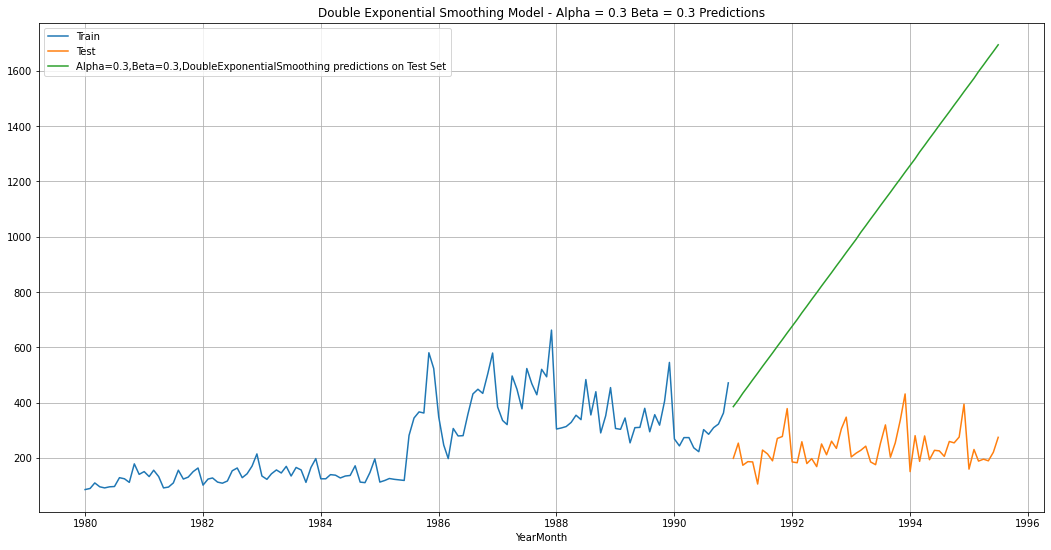

In [111]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_train['Shoe_Sales'], label='Train')
plt.plot(DES_test['Shoe_Sales'], label='Test')

plt.plot(DES_test['predict', 0.3, 0.3], label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.title('Double Exponential Smoothing Model - Alpha = 0.3 Beta = 0.3 Predictions');
plt.xlabel('YearMonth')
plt.grid();

In [112]:
resultsDf_7_1 = pd.DataFrame({'Test RMSE': [resultsDf_7.sort_values(by=['Test RMSE']).values[0][3]]}
                           ,index=['Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7_1])
resultsDf

Test RMSE
RegressionOnTime                                  266.276472
NaiveModel                                        245.121306
SimpleAverageModel                                 63.984570
2pointTrailingMovingAverage                        45.948736
4pointTrailingMovingAverage                        57.872686
6pointTrailingMovingAverage                        63.456893
9pointTrailingMovingAverage                        67.723648
Alpha=0.605,SimpleExponentialSmoothing            196.404844
Alpha=0.3,SimpleExponentialSmoothing              143.400350
Alpha=0.599 Beta = 0 ,DoubleExponentialSmoothing  270.531814
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing     890.968504

Model 7: Triple Exponential Smoothing (Holt-Winter's Model)

Three parameters  𝛼 ,  𝛽  and  𝛾  are estimated in this model. Level, Trend and Seasonality are accounted for in this model.

In [113]:
TES_train = train.copy()
TES_test = test.copy()

In [114]:
model_TES = ExponentialSmoothing(TES_train['Shoe_Sales'],trend='additive',seasonal='multiplicative')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [115]:
model_TES_autofit = model_TES.fit()

In [116]:
model_TES_autofit.params

{'damping_trend': nan,
 'initial_level': 116.41744246938596,
 'initial_seasons': array([1.05765614, 1.01075923, 1.23236094, 1.39610315, 1.32088522,
        1.07575887, 1.17770425, 1.49796811, 1.71186953, 1.47179512,
        1.75219588, 1.90514342]),
 'initial_trend': 0.2379483754554428,
 'lamda': None,
 'remove_bias': False,
 'smoothing_level': 0.5708490081189281,
 'smoothing_seasonal': 0.20321422093563166,
 'smoothing_trend': 0.00023506398612773108,
 'use_boxcox': False}

In [117]:
## Prediction on the test data

TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test))
TES_test.head()

Shoe_Sales  auto_predict
YearMonth                           
1991-01-01         198    261.556765
1991-02-01         253    243.492348
1991-03-01         173    257.686875
1991-04-01         186    271.016388
1991-05-01         185    268.352881

Text(0.5, 0, 'YearMonth')

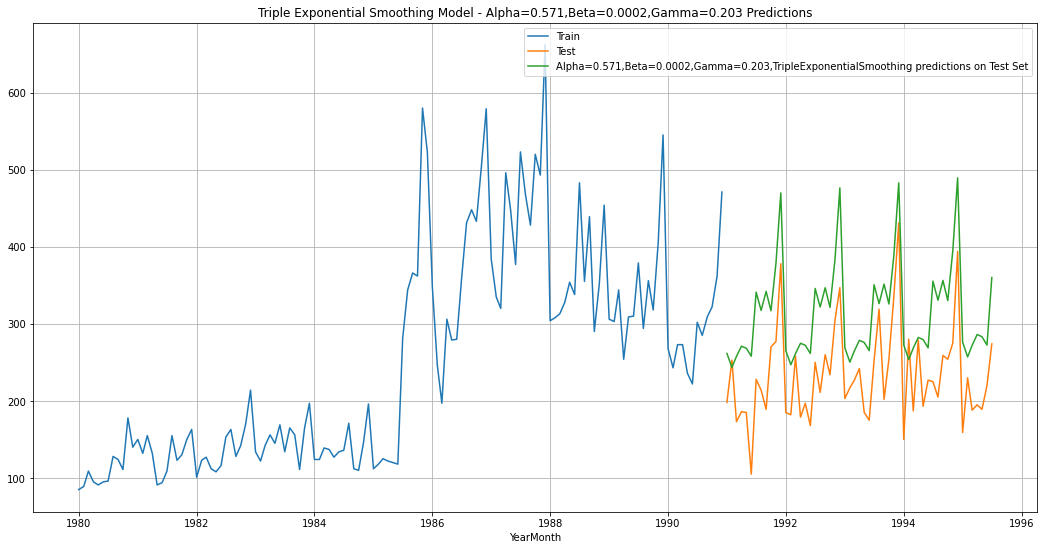

In [118]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['Shoe_Sales'], label='Train')
plt.plot(TES_test['Shoe_Sales'], label='Test')

plt.plot(TES_test['auto_predict'], label='Alpha=0.571,Beta=0.0002,Gamma=0.203,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();
plt.title('Triple Exponential Smoothing Model - Alpha=0.571,Beta=0.0002,Gamma=0.203 Predictions');
plt.xlabel('YearMonth')

In [119]:
## Test Data

rmse_model6_test_1 = metrics.mean_squared_error(TES_test['Shoe_Sales'],TES_test['auto_predict'],squared=False)
print("For Alpha=0.571,Beta=0.0002,Gamma=0.203, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model6_test_1))

For Alpha=0.571,Beta=0.0002,Gamma=0.203, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 88.425


In [120]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1]}
                           ,index=['Alpha=0.571,Beta=0.0002,Gamma=0.203,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf

Test RMSE
RegressionOnTime                                    266.276472
NaiveModel                                          245.121306
SimpleAverageModel                                   63.984570
2pointTrailingMovingAverage                          45.948736
4pointTrailingMovingAverage                          57.872686
6pointTrailingMovingAverage                          63.456893
9pointTrailingMovingAverage                          67.723648
Alpha=0.605,SimpleExponentialSmoothing              196.404844
Alpha=0.3,SimpleExponentialSmoothing                143.400350
Alpha=0.599 Beta = 0 ,DoubleExponentialSmoothing    270.531814
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       890.968504
Alpha=0.571,Beta=0.0002,Gamma=0.203,TripleExpon...   88.424694

In [121]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_8_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_8_2

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Test RMSE]
Index: []

In [122]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        for k in np.arange(0.3,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
        
            rmse_model8_train = metrics.mean_squared_error(TES_train['Shoe_Sales'],TES_train['predict',i,j,k],squared=False)
            
            rmse_model8_test = metrics.mean_squared_error(TES_test['Shoe_Sales'],TES_test['predict',i,j,k],squared=False)
            
            resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model8_train,'Test RMSE':rmse_model8_test}
                                                 , ignore_index=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/

In [123]:
resultsDf_8_2.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Gamma Values  Train RMSE  Test RMSE
1             0.3          0.3           0.4   70.221173  47.886599
65            0.4          0.3           0.4   63.772346  63.601680
325           0.8          0.3           0.8   97.587052  72.959100
57            0.3          1.0           0.4   63.578341  73.527921
3             0.3          0.3           0.6  104.114083  74.200073

Text(0.5, 0, 'YearMonth')

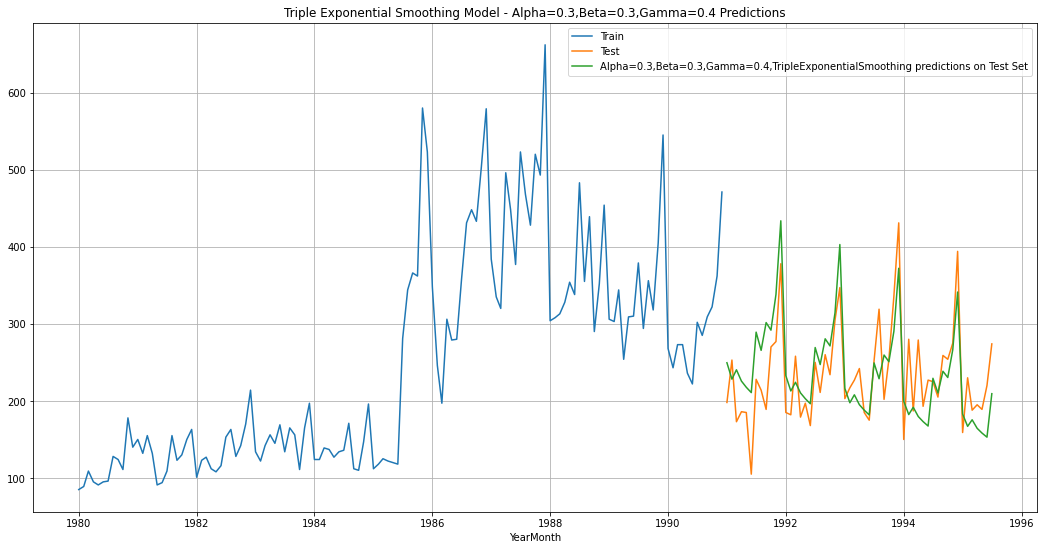

In [124]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.figure(figsize=(18,9))
plt.plot(TES_train['Shoe_Sales'], label='Train')
plt.plot(TES_test['Shoe_Sales'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_test['predict', 0.3, 0.3, 0.4], label='Alpha=0.3,Beta=0.3,Gamma=0.4,TripleExponentialSmoothing predictions on Test Set')
#plt.plot(TES_test['predict', 0.3, 0.3, 0.4], label='Alpha=0.3,Beta=0.3,Gamma=0.4,TripleExponentialSmoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid();
plt.title('Triple Exponential Smoothing Model - Alpha=0.3,Beta=0.3,Gamma=0.4 Predictions');
plt.xlabel('YearMonth')

In [125]:
resultsDf_8_3 = pd.DataFrame({'Test RMSE': [resultsDf_8_2.sort_values(by=['Test RMSE']).values[0][4]]}
                           ,index=['Alpha=0.3,Beta=0.3,Gamma=0.4,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_3])
resultsDf

Test RMSE
RegressionOnTime                                    266.276472
NaiveModel                                          245.121306
SimpleAverageModel                                   63.984570
2pointTrailingMovingAverage                          45.948736
4pointTrailingMovingAverage                          57.872686
6pointTrailingMovingAverage                          63.456893
9pointTrailingMovingAverage                          67.723648
Alpha=0.605,SimpleExponentialSmoothing              196.404844
Alpha=0.3,SimpleExponentialSmoothing                143.400350
Alpha=0.599 Beta = 0 ,DoubleExponentialSmoothing    270.531814
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       890.968504
Alpha=0.571,Beta=0.0002,Gamma=0.203,TripleExpon...   88.424694
Alpha=0.3,Beta=0.3,Gamma=0.4,TripleExponentialS...   47.886599

In [126]:
print('Sorted by RMSE values on the Test Data:','\n',)
resultsDf.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



Test RMSE
2pointTrailingMovingAverage                          45.948736
Alpha=0.3,Beta=0.3,Gamma=0.4,TripleExponentialS...   47.886599
4pointTrailingMovingAverage                          57.872686
6pointTrailingMovingAverage                          63.456893
SimpleAverageModel                                   63.984570
9pointTrailingMovingAverage                          67.723648
Alpha=0.571,Beta=0.0002,Gamma=0.203,TripleExpon...   88.424694
Alpha=0.3,SimpleExponentialSmoothing                143.400350
Alpha=0.605,SimpleExponentialSmoothing              196.404844
NaiveModel                                          245.121306
RegressionOnTime                                    266.276472
Alpha=0.599 Beta = 0 ,DoubleExponentialSmoothing    270.531814
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       890.968504

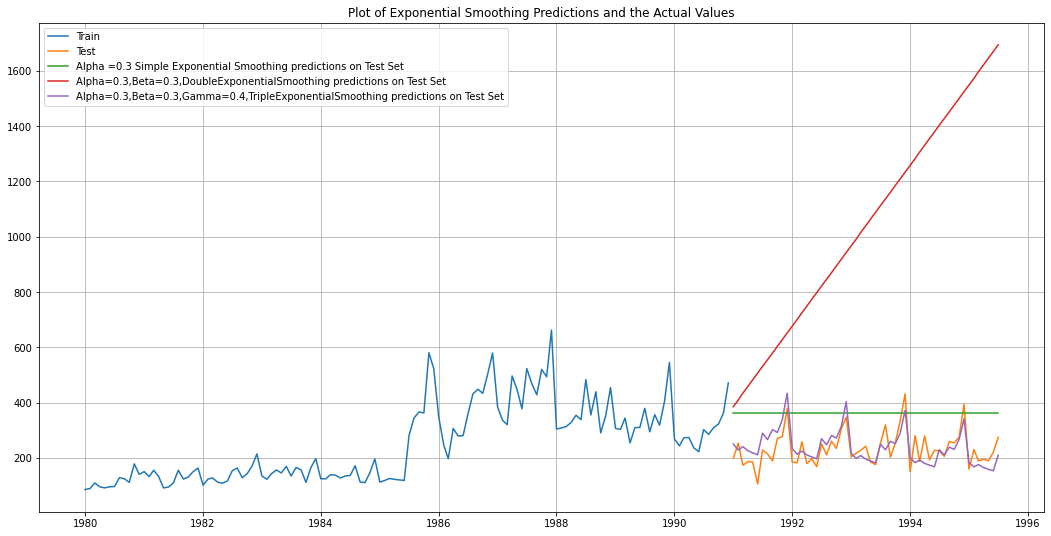

In [127]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(train['Shoe_Sales'], label='Train')
plt.plot(test['Shoe_Sales'], label='Test')

plt.plot(SES_test['predict', 0.3], label='Alpha =0.3 Simple Exponential Smoothing predictions on Test Set')

plt.plot(DES_test['predict', 0.3, 0.3], label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Test Set')

plt.plot(TES_test['predict', 0.3, 0.3, 0.4], label='Alpha=0.3,Beta=0.3,Gamma=0.4,TripleExponentialSmoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid();
plt.title('Plot of Exponential Smoothing Predictions and the Actual Values');

5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.

The Augmented Dickey-Fuller test is an unit root test which determines whether there is a unit root and subsequently whether the series is non-stationary.

The hypothesis in a simple form for the ADF test is:

*   H0 : The Time Series has a unit root and is thus non-stationary.
*   H1 : The Time Series does not have a unit root and is thus stationary.

We would want the series to be stationary for building ARIMA models and thus we would want the p-value of this test to be less than the α value.

In [128]:
from statsmodels.tsa.stattools import adfuller

In [129]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=5).mean()
    rolstd = timeseries.rolling(window=5).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag = 'AIC',regression='ct')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

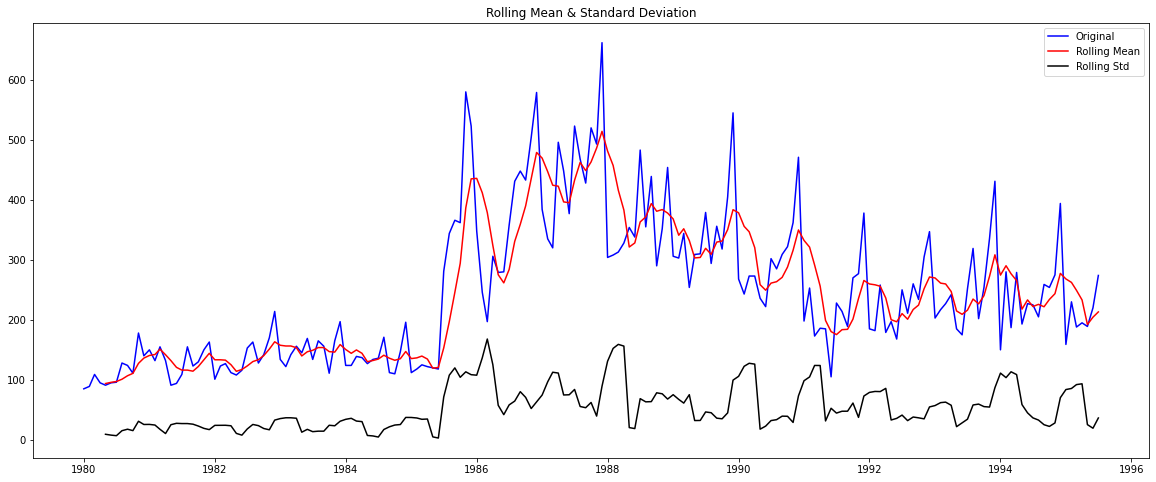

Results of Dickey-Fuller Test:
Test Statistic                  -1.576714
p-value                          0.801419
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -4.012076
Critical Value (5%)             -3.436179
Critical Value (10%)            -3.142131
dtype: float64 



In [130]:
test_stationarity(df1)

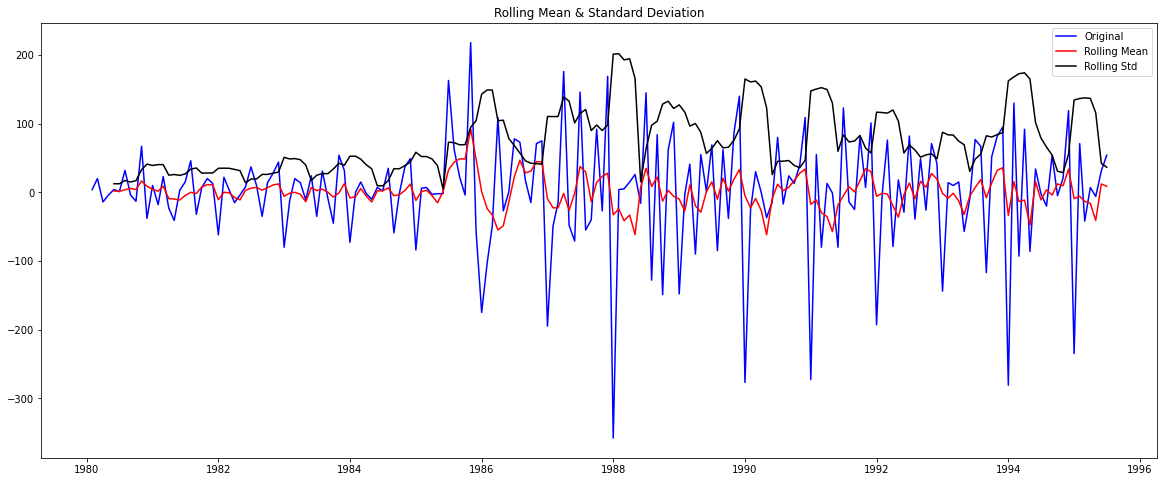

Results of Dickey-Fuller Test:
Test Statistic                  -3.531722
p-value                          0.036117
#Lags Used                      12.000000
Number of Observations Used    173.000000
Critical Value (1%)             -4.012076
Critical Value (5%)             -3.436179
Critical Value (10%)            -3.142131
dtype: float64 



In [131]:
test_stationarity(df1.diff().dropna())

6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

ARIMA Model

In [132]:
import itertools
p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Examples of the parameter combinations for the Model')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Examples of the parameter combinations for the Model
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [133]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [134]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:# running a loop within the pdq parameters defined by itertools
    ARIMA_model = ARIMA(train['Shoe_Sales'].values,order=param).fit()#fitting the ARIMA model
    #using the parameters from the loop
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))#printing the parameters and the AIC
    #from the fitted models
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
    #appending the AIC values and the model parameters to the previously created data frame
    #for easier understanding and sorting of the AIC values

ARIMA(0, 1, 0) - AIC:1508.283772209596
ARIMA(0, 1, 1) - AIC:1497.050322418775
ARIMA(0, 1, 2) - AIC:1494.9646053663387
ARIMA(0, 1, 3) - AIC:1495.1484738738814
ARIMA(1, 1, 0) - AIC:1501.6431242011724
ARIMA(1, 1, 1) - AIC:1492.4871865078965
ARIMA(1, 1, 2) - AIC:1494.4238594575938
ARIMA(1, 1, 3) - AIC:1496.3858782559132
ARIMA(2, 1, 0) - AIC:1498.9504830259289
ARIMA(2, 1, 1) - AIC:1494.4314983035908
ARIMA(2, 1, 2) - AIC:1496.4107391811908


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(2, 1, 3) - AIC:1480.7939885166136
ARIMA(3, 1, 0) - AIC:1498.9303094226934
ARIMA(3, 1, 1) - AIC:1496.346864104829


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(3, 1, 2) - AIC:1495.655854547851
ARIMA(3, 1, 3) - AIC:1479.6876464938946


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [135]:
ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

param          AIC
15  (3, 1, 3)  1479.687646
11  (2, 1, 3)  1480.793989
5   (1, 1, 1)  1492.487187
6   (1, 1, 2)  1494.423859
9   (2, 1, 1)  1494.431498

In [136]:
auto_ARIMA = ARIMA(train, order=(3,1,3))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             Shoe_Sales   No. Observations:                  132
Model:                 ARIMA(3, 1, 3)   Log Likelihood                -732.844
Date:                Mon, 04 Apr 2022   AIC                           1479.688
Time:                        04:43:10   BIC                           1499.814
Sample:                    01-01-1980   HQIC                          1487.866
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5605      0.117      4.805      0.000       0.332       0.789
ar.L2         -1.0069      0.022    -45.328      0.000      -1.050      -0.963
ar.L3          0.5438      0.119      4.574      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


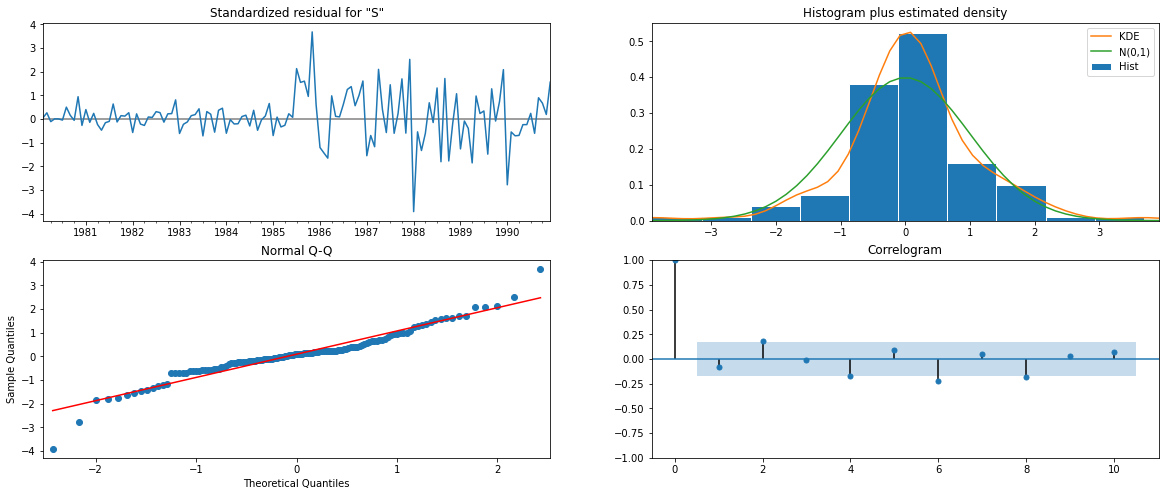

In [137]:
results_auto_ARIMA.plot_diagnostics();

In [138]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [139]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

## Importing the mean_squared_error function from sklearn to calculate the RMSE

from sklearn.metrics import mean_squared_error

In [140]:
rmse = mean_squared_error(test['Shoe_Sales'],predicted_auto_ARIMA,squared=False)
mape = mean_absolute_percentage_error(test['Shoe_Sales'],predicted_auto_ARIMA)
print('RMSE for ARIMA model:',rmse,'\nMAPE for ARIMA Model:',mape)

RMSE for ARIMA model: 135.81103341893302 
MAPE for ARIMA Model: 61.99052958152122


In [141]:
resultsDf2 = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['ARIMA(3,1,3)'])

resultsDf2

RMSE      MAPE
ARIMA(3,1,3)  135.811033  61.99053

SARIMA Model

In [142]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

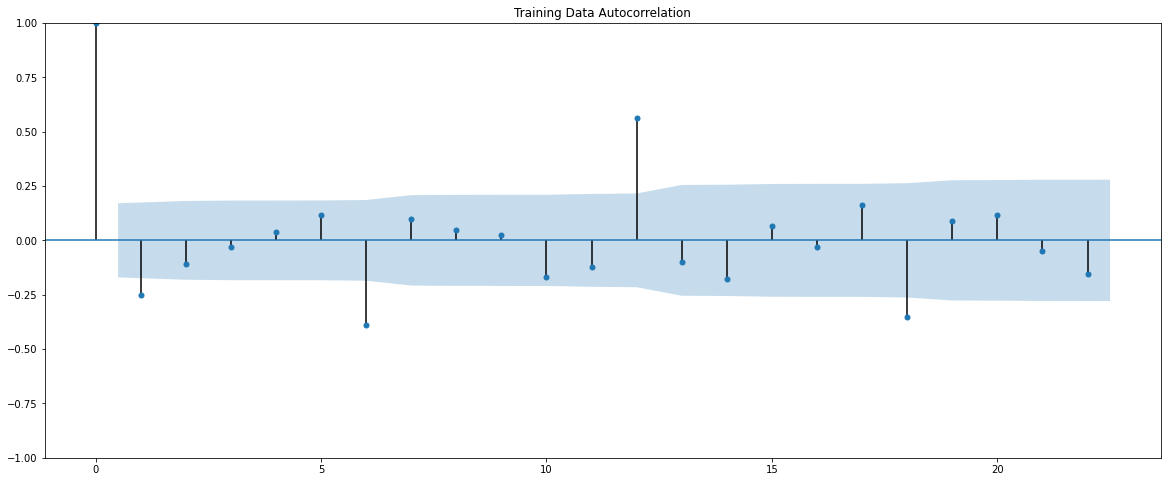

In [143]:
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop');

In [144]:
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (0, 1, 3)(0, 0, 3, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (1, 1, 3)(1, 0, 3, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)
Model: (2, 1, 3)(2, 0, 3, 6)
Model: (3, 1, 0)(3, 0, 0, 6)
Model: (3, 1, 1)(3, 0, 1, 6)
Model: (3, 1, 2)(3, 0, 2, 6)
Model: (3, 1, 3)(3, 0, 3, 6)


In [145]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [146]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Shoe_Sales'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
        

SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:1497.7788474019549
SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:1426.3361157221507
SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:1334.5305386143489
SARIMA(0, 1, 0)x(0, 0, 3, 6) - AIC:1272.7823748146584
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC:1426.0492095804898
SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:1385.5711563547804
SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:1319.6061076038225
SARIMA(0, 1, 0)x(1, 0, 3, 6) - AIC:1254.3273611702411
SARIMA(0, 1, 0)x(2, 0, 0, 6) - AIC:1323.6330116787822
SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:1322.9358084091969
SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:1312.6718076778507
SARIMA(0, 1, 0)x(2, 0, 3, 6) - AIC:1253.134953175344
SARIMA(0, 1, 0)x(3, 0, 0, 6) - AIC:1262.9486596454287
SARIMA(0, 1, 0)x(3, 0, 1, 6) - AIC:1263.357309903642
SARIMA(0, 1, 0)x(3, 0, 2, 6) - AIC:1264.2045276376284
SARIMA(0, 1, 0)x(3, 0, 3, 6) - AIC:1254.842487730851
SARIMA(0, 1, 1)x(0, 0, 0, 6) - AIC:1476.0167777381578
SARIMA(0, 1, 1)x(0, 0, 1, 6) - AIC:1405.25099478324
SARIMA(0, 1, 1)x(0, 0, 2, 6) - AI

In [147]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param      seasonal          AIC
59   (0, 1, 3)  (2, 0, 3, 6)  1208.149006
123  (1, 1, 3)  (2, 0, 3, 6)  1209.791558
63   (0, 1, 3)  (3, 0, 3, 6)  1210.147616
55   (0, 1, 3)  (1, 0, 3, 6)  1211.609239
187  (2, 1, 3)  (2, 0, 3, 6)  1211.763032

In [148]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(train['Shoe_Sales'],
                                order=(0, 1, 3),
                                seasonal_order=(2, 0, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                     
Dep. Variable:                        Shoe_Sales   No. Observations:                  132
Model:             SARIMAX(0, 1, 3)x(2, 0, 3, 6)   Log Likelihood                -595.075
Date:                           Mon, 04 Apr 2022   AIC                           1208.149
Time:                                   04:45:47   BIC                           1232.371
Sample:                               01-01-1980   HQIC                          1217.972
                                    - 12-01-1990                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4238      0.088     -4.804      0.000      -0.597      -0.251
ma.L2          0.0896      0.096      0.933

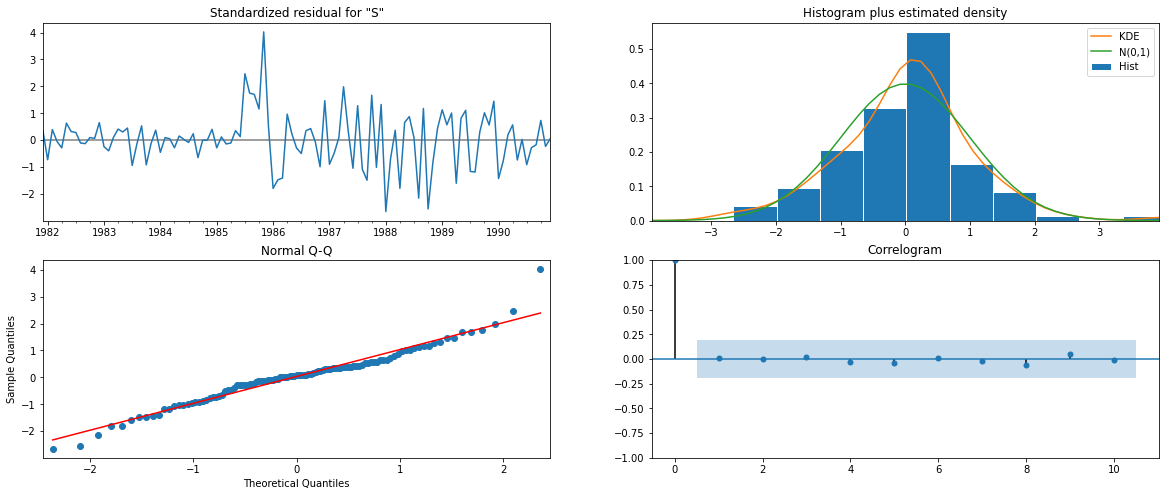

In [149]:
results_auto_SARIMA.plot_diagnostics();

In [150]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test))

In [151]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

Shoe_Sales        mean    mean_se  mean_ci_lower  mean_ci_upper
1991-01-01  230.483789  55.712354     121.289581     339.677997
1991-02-01  223.748869  64.298188      97.726735     349.771002
1991-03-01  232.112401  74.229146      86.625949     377.598853
1991-04-01  259.566215  77.861893     106.959710     412.172720
1991-05-01  219.255221  81.335492      59.840587     378.669856

In [152]:
rmse = mean_squared_error(test['Shoe_Sales'],predicted_auto_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['Shoe_Sales'],predicted_auto_SARIMA.predicted_mean)
print('RMSE for SARIMA:',rmse,'\nMAPE for SARIMA:',mape)

RMSE for SARIMA: 59.29461701396297 
MAPE for SARIMA: 23.022148506236704


In [153]:
temp_resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['SARIMA(0,1,3)(2,0,3,6)'])


resultsDf2 = pd.concat([resultsDf2,temp_resultsDf])

resultsDf2

RMSE       MAPE
ARIMA(3,1,3)            135.811033  61.990530
SARIMA(0,1,3)(2,0,3,6)   59.294617  23.022149

7. Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

Manual ARIMA Model

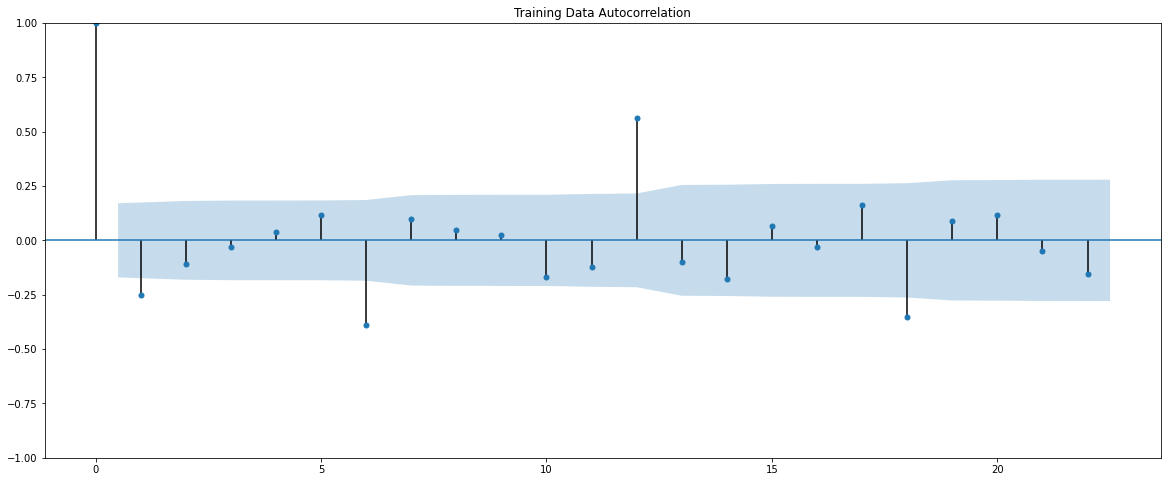

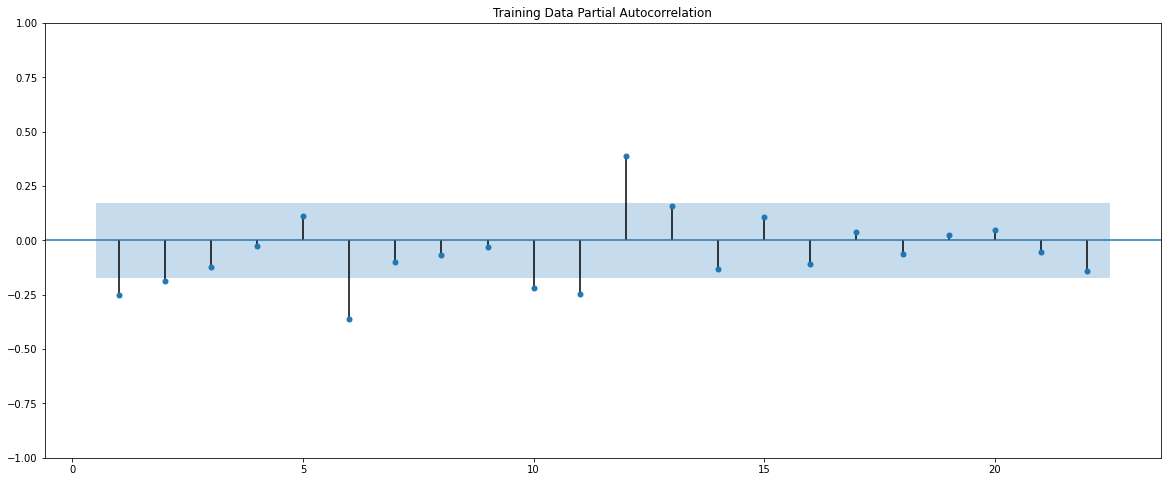

In [154]:
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop')
plot_pacf(train.diff().dropna(),title='Training Data Partial Autocorrelation',zero=False,method='ywmle')
plt.show()

Here, we have taken alpha=0.05.

*  The Auto-Regressive parameter in an ARIMA model is 'p' which comes from the significant lag before which the PACF plot cuts-off to 2.
*  The Moving-Average parameter in an ARIMA model is 'q' which comes from the significant lag before the ACF plot cuts-off to 1.

By looking at the above plots, we will take the value of p and q to be 2 and 1 respectively.

In [155]:
manual_ARIMA = ARIMA(train['Shoe_Sales'], order=(2,1,1))

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:             Shoe_Sales   No. Observations:                  132
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -743.216
Date:                Mon, 04 Apr 2022   AIC                           1494.431
Time:                        04:45:49   BIC                           1505.932
Sample:                    01-01-1980   HQIC                          1499.105
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4698      0.112      4.212      0.000       0.251       0.688
ar.L2          0.0234      0.111      0.211      0.833      -0.194       0.241
ma.L1         -0.8430      0.089     -9.497      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


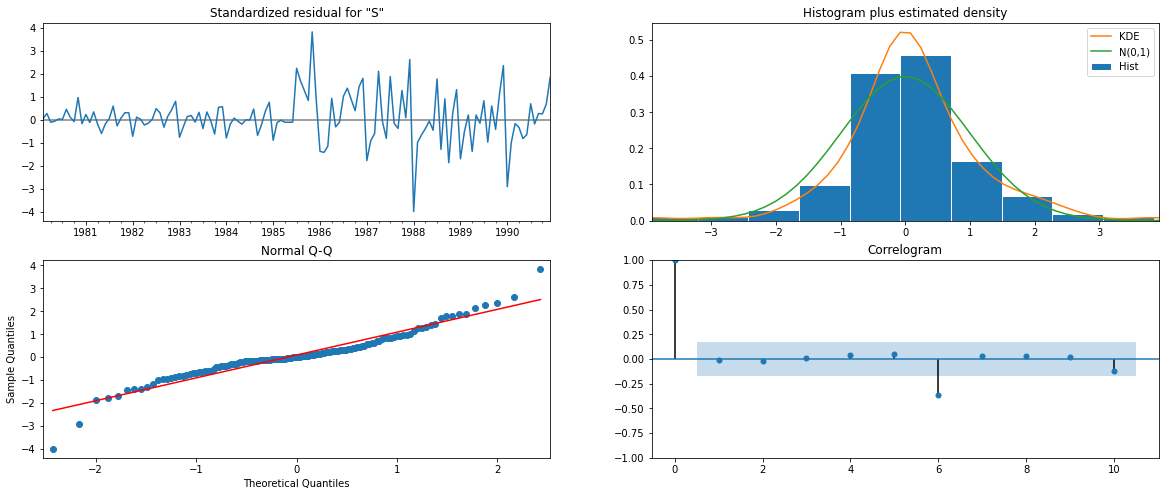

In [156]:
results_manual_ARIMA.plot_diagnostics();

In [157]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [158]:
rmse = mean_squared_error(test['Shoe_Sales'],predicted_manual_ARIMA,squared=False)
mape = mean_absolute_percentage_error(test['Shoe_Sales'],predicted_manual_ARIMA)
print('RMSE for manual ARIMA:',rmse,'\nMAPE for manual ARIMA:',mape)

RMSE for manual ARIMA: 143.25358521804836 
MAPE for manual ARIMA: 66.47287658026555


In [159]:
temp_resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['ACF&PACF - ARIMA(2,1,1)'])


resultsDf2 = pd.concat([resultsDf2,temp_resultsDf])

resultsDf2

RMSE       MAPE
ARIMA(3,1,3)             135.811033  61.990530
SARIMA(0,1,3)(2,0,3,6)    59.294617  23.022149
ACF&PACF - ARIMA(2,1,1)  143.253585  66.472877

Manual SARIMA Model - Seasonality at 6

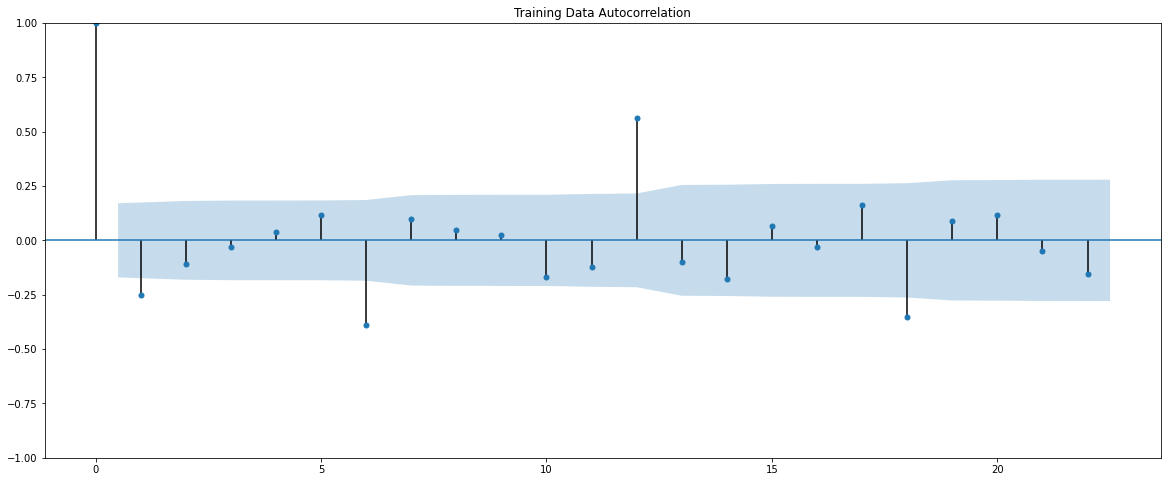

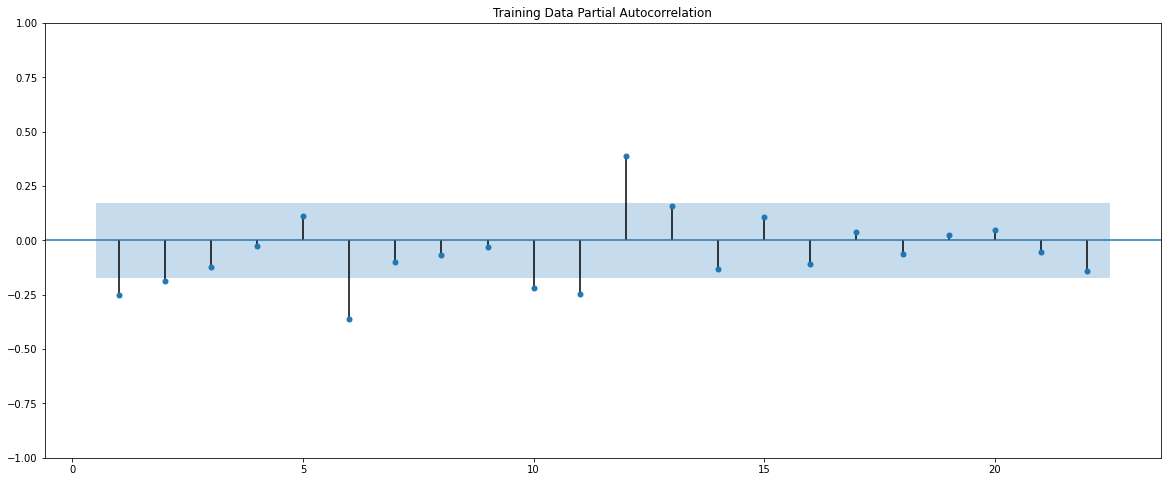

In [160]:
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop')
plot_pacf(train.diff().dropna(),title='Training Data Partial Autocorrelation',zero=False,method='ywmle');

Here, we have taken alpha=0.05.

We are going to take the seasonal period as 6. We are taking the p value to be 2 and the q value also to be 1 as the parameters same as the ARIMA model.

*   The Auto-Regressive parameter in an SARIMA model is 'P' which comes from the significant lag after which the PACF plot cuts-off to 2.
*   The Moving-Average parameter in an SARIMA model is 'Q' which comes from the significant lag after which the ACF plot cuts-off to 1.


In [161]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(train['Shoe_Sales'],
                                order=(2,1,1),
                                seasonal_order=(2, 0, 1, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                     
Dep. Variable:                        Shoe_Sales   No. Observations:                  132
Model:             SARIMAX(2, 1, 1)x(2, 0, 1, 6)   Log Likelihood                -638.638
Date:                           Mon, 04 Apr 2022   AIC                           1291.276
Time:                                   04:45:51   BIC                           1310.611
Sample:                               01-01-1980   HQIC                          1299.126
                                    - 12-01-1990                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4850      0.133      3.650      0.000       0.225       0.745
ar.L2          0.1658      0.118      1.406

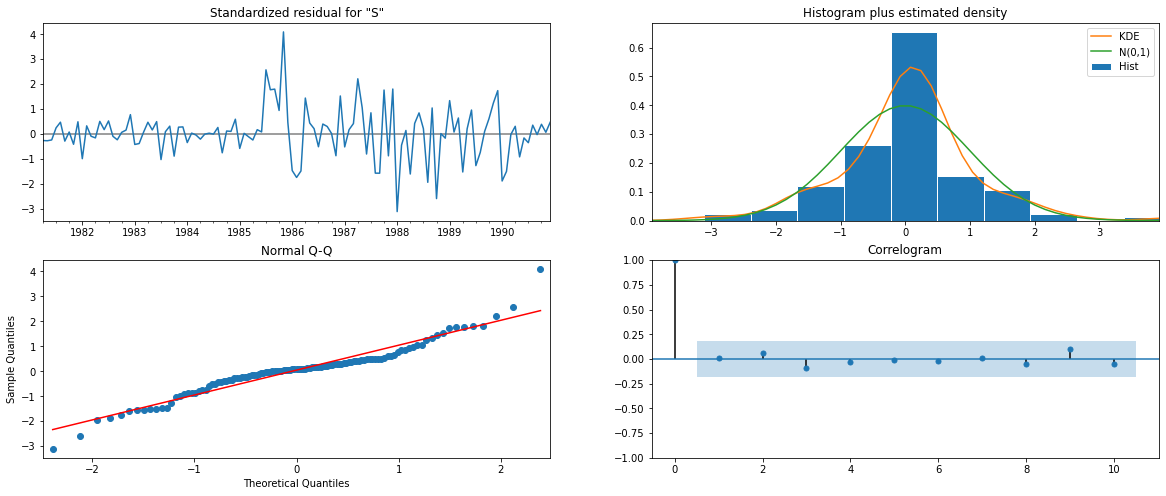

In [162]:
results_manual_SARIMA.plot_diagnostics()
plt.show()

In [163]:
predicted_manual_SARIMA = results_manual_SARIMA.get_forecast(steps=len(test))

In [164]:
rmse = mean_squared_error(test['Shoe_Sales'],predicted_manual_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['Shoe_Sales'],predicted_manual_SARIMA.predicted_mean)
print('RMSE for manual SARIMA:',rmse,'\nMAPE for manual SARIMA:',mape)

RMSE for manual SARIMA: 79.59911000962485 
MAPE for manual SARIMA: 35.38065784049989


In [165]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse],'MAPE':mape}
                           ,index=['ACF& PACF - SARIMA(2,1,1)(2,0,1,6)'])


resultsDf2 = pd.concat([resultsDf2,temp_resultsDf])

resultsDf2

RMSE       MAPE
ARIMA(3,1,3)                        135.811033  61.990530
SARIMA(0,1,3)(2,0,3,6)               59.294617  23.022149
ACF&PACF - ARIMA(2,1,1)             143.253585  66.472877
ACF& PACF - SARIMA(2,1,1)(2,0,1,6)   79.599110  35.380658

8. Build a table with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [166]:
resultsDf

Test RMSE
RegressionOnTime                                    266.276472
NaiveModel                                          245.121306
SimpleAverageModel                                   63.984570
2pointTrailingMovingAverage                          45.948736
4pointTrailingMovingAverage                          57.872686
6pointTrailingMovingAverage                          63.456893
9pointTrailingMovingAverage                          67.723648
Alpha=0.605,SimpleExponentialSmoothing              196.404844
Alpha=0.3,SimpleExponentialSmoothing                143.400350
Alpha=0.599 Beta = 0 ,DoubleExponentialSmoothing    270.531814
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       890.968504
Alpha=0.571,Beta=0.0002,Gamma=0.203,TripleExpon...   88.424694
Alpha=0.3,Beta=0.3,Gamma=0.4,TripleExponentialS...   47.886599

In [168]:
resultsDf2

RMSE       MAPE
ARIMA(3,1,3)                        135.811033  61.990530
SARIMA(0,1,3)(2,0,3,6)               59.294617  23.022149
ACF&PACF - ARIMA(2,1,1)             143.253585  66.472877
ACF& PACF - SARIMA(2,1,1)(2,0,1,6)   79.599110  35.380658

9. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

In [169]:
print('Sorted by RMSE values on the Test Data:','\n',)
resultsDf.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



Test RMSE
2pointTrailingMovingAverage                          45.948736
Alpha=0.3,Beta=0.3,Gamma=0.4,TripleExponentialS...   47.886599
4pointTrailingMovingAverage                          57.872686
6pointTrailingMovingAverage                          63.456893
SimpleAverageModel                                   63.984570
9pointTrailingMovingAverage                          67.723648
Alpha=0.571,Beta=0.0002,Gamma=0.203,TripleExpon...   88.424694
Alpha=0.3,SimpleExponentialSmoothing                143.400350
Alpha=0.605,SimpleExponentialSmoothing              196.404844
NaiveModel                                          245.121306
RegressionOnTime                                    266.276472
Alpha=0.599 Beta = 0 ,DoubleExponentialSmoothing    270.531814
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       890.968504

In [170]:
print('Sorted by RMSE values on the Test Data:','\n',)
resultsDf2.sort_values(by=['RMSE'])

Sorted by RMSE values on the Test Data: 



RMSE       MAPE
SARIMA(0,1,3)(2,0,3,6)               59.294617  23.022149
ACF& PACF - SARIMA(2,1,1)(2,0,1,6)   79.599110  35.380658
ARIMA(3,1,3)                        135.811033  61.990530
ACF&PACF - ARIMA(2,1,1)             143.253585  66.472877

Triple Exponential Smoothing Model

In [171]:
fullmodel1 = ExponentialSmoothing(df1,
                                  trend='additive',
                                  seasonal='multiplicative').fit(smoothing_level=0.3,
                                                                 smoothing_trend=0.3,
                                                                 smoothing_seasonal=0.4)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [172]:
RMSE_fullmodel1 = metrics.mean_squared_error(df1['Shoe_Sales'],fullmodel1.fittedvalues,squared=False)

print('RMSE for the full model (Triple Exponential Smoothing):',RMSE_fullmodel1)

RMSE for the full model (Triple Exponential Smoothing): 60.291230997200486


In [173]:
prediction_1 = fullmodel1.forecast(steps=12)

Text(0.5, 1.0, 'Forecast using Triple Exponential Smoothing Model')

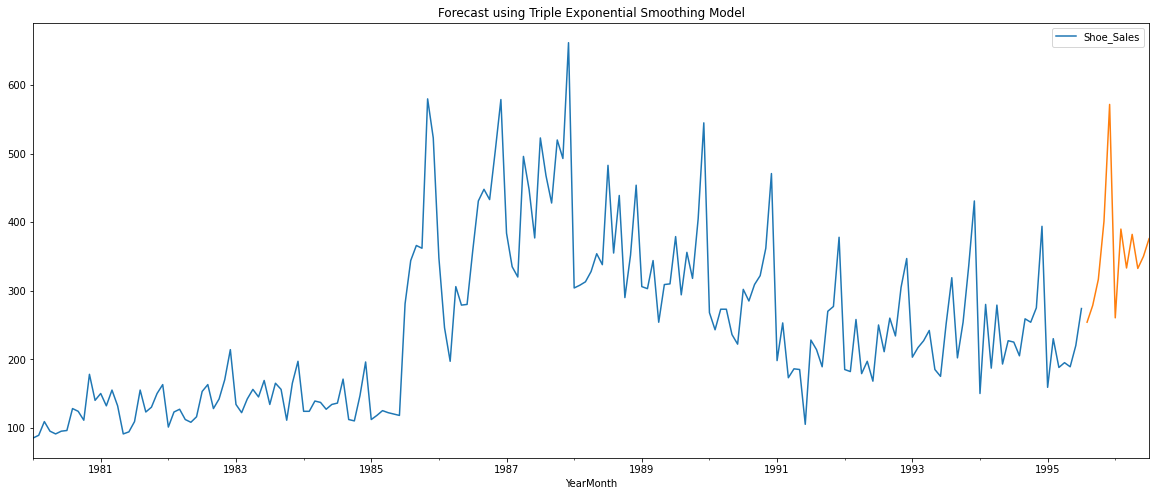

In [174]:
df1.plot()
prediction_1.plot();
plt.title('Forecast using Triple Exponential Smoothing Model')

In [175]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#Here we are taking the multiplier to be 1.96 as we want to plot with respect to a 95% confidence intervals.
pred_1_df = pd.DataFrame({'lower_CI':prediction_1 - 1.96*np.std(fullmodel1.resid,ddof=1),
                          'prediction':prediction_1,
                          'upper_ci': prediction_1 + 1.96*np.std(fullmodel1.resid,ddof=1)})
pred_1_df.head()

lower_CI  prediction    upper_ci
1995-08-01  135.653813  254.059168  372.464523
1995-09-01  160.119082  278.524437  396.929792
1995-10-01  198.223914  316.629269  435.034624
1995-11-01  282.992528  401.397883  519.803238
1995-12-01  453.492269  571.897624  690.302979

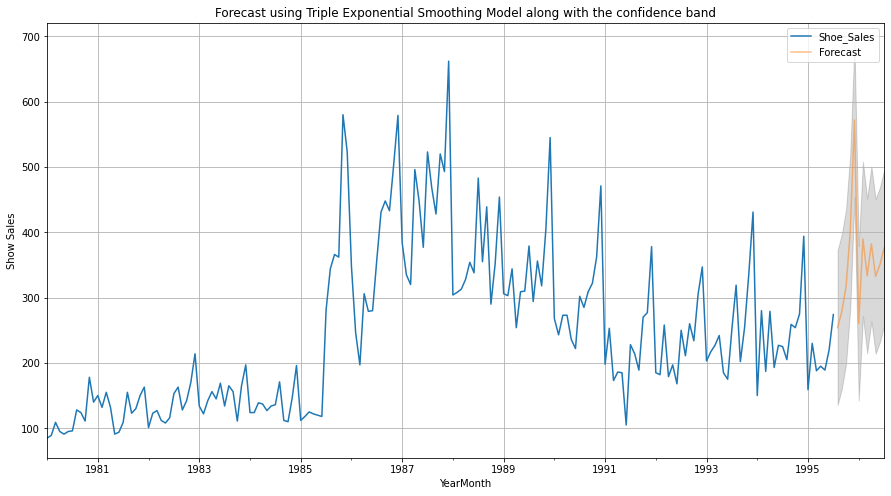

In [176]:
# plot the forecast along with the confidence band

axis = df1.plot(label='Actual', figsize=(15,8))
pred_1_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_1_df.index, pred_1_df['lower_CI'], pred_1_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('YearMonth')
axis.set_ylabel('Show Sales')
plt.title('Forecast using Triple Exponential Smoothing Model along with the confidence band')
plt.legend(loc='best')
plt.grid()
plt.show()

SARIMA Model

In [177]:
fullmodel2 = sm.tsa.statespace.SARIMAX(df1['Shoe_Sales'],
                                order=(0,1,3),
                                seasonal_order=(2, 0, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = fullmodel2.fit(maxiter=1000)
print(results_full_data_model.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                     
Dep. Variable:                        Shoe_Sales   No. Observations:                  187
Model:             SARIMAX(0, 1, 3)x(2, 0, 3, 6)   Log Likelihood                -886.578
Date:                           Mon, 04 Apr 2022   AIC                           1791.156
Time:                                   05:20:06   BIC                           1819.055
Sample:                               01-01-1980   HQIC                          1802.482
                                    - 07-01-1995                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5122      0.072     -7.152      0.000      -0.653      -0.372
ma.L2          0.1447      0.080      1.811

In [178]:
predicted_manual_SARIMA_full_data = results_full_data_model.get_forecast(steps=12)

In [179]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_full_data.summary_frame(alpha=0.05)
pred_full_manual_SARIMA_date.head()

Shoe_Sales        mean    mean_se  mean_ci_lower  mean_ci_upper
1995-08-01  240.429512  52.104818     138.305946     342.553079
1995-09-01  254.634233  57.972764     141.009703     368.258763
1995-10-01  251.910479  66.685534     121.209234     382.611724
1995-11-01  315.495164  70.974975     176.386769     454.603559
1995-12-01  394.034424  75.019556     246.998796     541.070052

In [180]:
rmse = mean_squared_error(df1['Shoe_Sales'],results_full_data_model.fittedvalues,squared=False)
print('RMSE for the full model (SARIMA):',rmse)

RMSE for the full model (SARIMA): 51.01234461372004


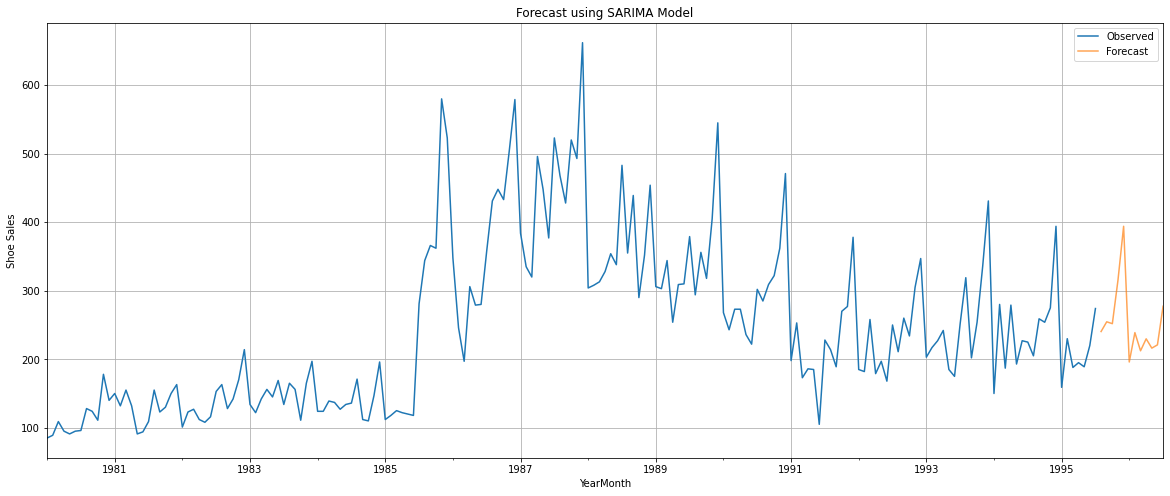

In [181]:
axis = df1['Shoe_Sales'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
plt.title('Forecast using SARIMA Model')
axis.set_xlabel('YearMonth')
axis.set_ylabel('Shoe Sales')
plt.legend(loc='best')
plt.grid();

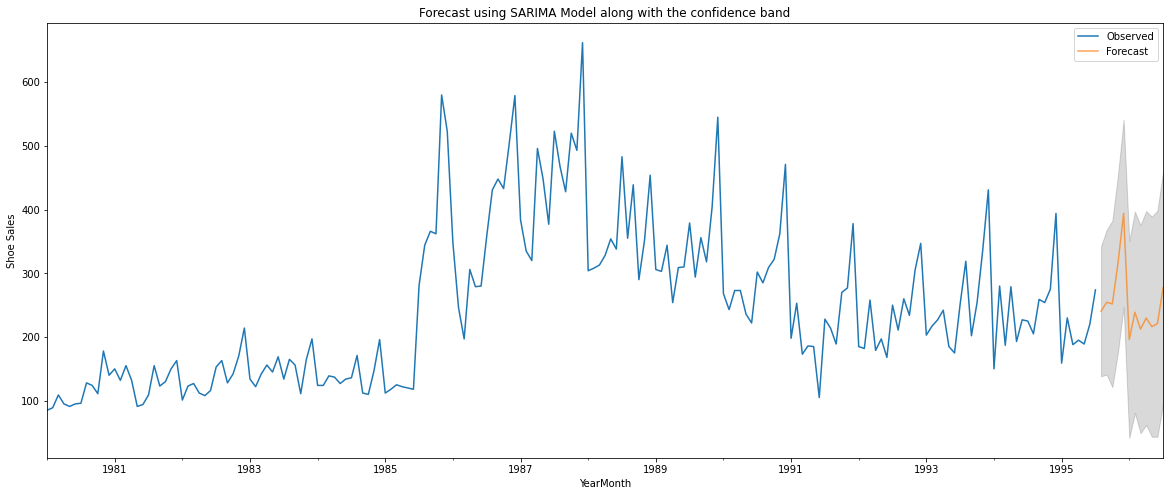

In [182]:
# plot the forecast along with the confidence band

axis = df1['Shoe_Sales'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('YearMonth')
axis.set_ylabel('Shoe Sales')
plt.title('Forecast using SARIMA Model along with the confidence band')
plt.legend(loc='best')
plt.show()

END